### Проектная работа

https://www.kaggle.com/datasets/sellingstories/travel-company-insurance-prediction

Данные взяты с сайта kaggle
1. По ссылке находились 2 датасета: один с признаками и таргетом, второй - только с признаками, без таргета.
2. Первый датасет: прозведен первичный анализ, EDA. 
3. На примере первого датасета построены 7 моделей: KNN, Logistic Regression, Decision tree, Random Forest, Gradient Boosting, CatBoosting, LightGBM, SVC, Naive bayes. По метрикам выбрана модель LightGBM. 
4. Второй датасет (без таргета), произведен EDA, далее датасет загружен в уже обученную модель LightGBM для получения прогноза таргета. 

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Travel_Company_Old_Clients.csv', sep = ';')
data.head()

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Self Employed           Yes        700000   
4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

#### Описание признаков
Age - Age Of The Customer

Employment Type - The Sector In Which Customer Is Employed

GraduateOrNot - Whether The Customer Is College Graduate Or Not

AnnualIncome - The Yearly Income Of The Customer In Indian Rupees

FamilyMembers - Number Of Members In Customer's Family

ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years 2017-2019

EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country

TravelInsurance (1st File Only) - Did The Customer Buy Travel Insurance Package During Introductory Offering

### Анализ датасета

In [3]:
data.shape

(682, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  682 non-null    int64 
 1   Employment Type      682 non-null    object
 2   GraduateOrNot        682 non-null    object
 3   AnnualIncome         682 non-null    int64 
 4   FamilyMembers        682 non-null    int64 
 5   ChronicDiseases      682 non-null    int64 
 6   FrequentFlyer        682 non-null    object
 7   EverTravelledAbroad  682 non-null    object
 8   TravelInsurance      682 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 48.1+ KB


In [5]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
data.duplicated().sum()

113

In [7]:
data.drop_duplicates(inplace = True)
data = data.reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  569 non-null    int64 
 1   Employment Type      569 non-null    object
 2   GraduateOrNot        569 non-null    object
 3   AnnualIncome         569 non-null    int64 
 4   FamilyMembers        569 non-null    int64 
 5   ChronicDiseases      569 non-null    int64 
 6   FrequentFlyer        569 non-null    object
 7   EverTravelledAbroad  569 non-null    object
 8   TravelInsurance      569 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 40.1+ KB


### Выводы
1. Датасет размером 682х9
2. Пропусков нет
3. 4 категориальных признака
4. Дубликаты 113 
5. Датасет без дубликатов 569х9

### Визуализация

In [8]:
data.describe()

Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  569.000000  5.690000e+02     569.000000       569.000000   
mean    29.627417  9.551845e+05       4.912127         0.305800   
std      2.887873  3.637326e+05       1.702115         0.461151   
min     25.000000  3.000000e+05       2.000000         0.000000   
25%     28.000000  6.500000e+05       4.000000         0.000000   
50%     29.000000  9.500000e+05       5.000000         0.000000   
75%     32.000000  1.250000e+06       6.000000         1.000000   
max     35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count       569.000000  
mean          0.355009  
std           0.478937  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'TravelInsurance'}>, <Axes: >]],
      dtype=object)

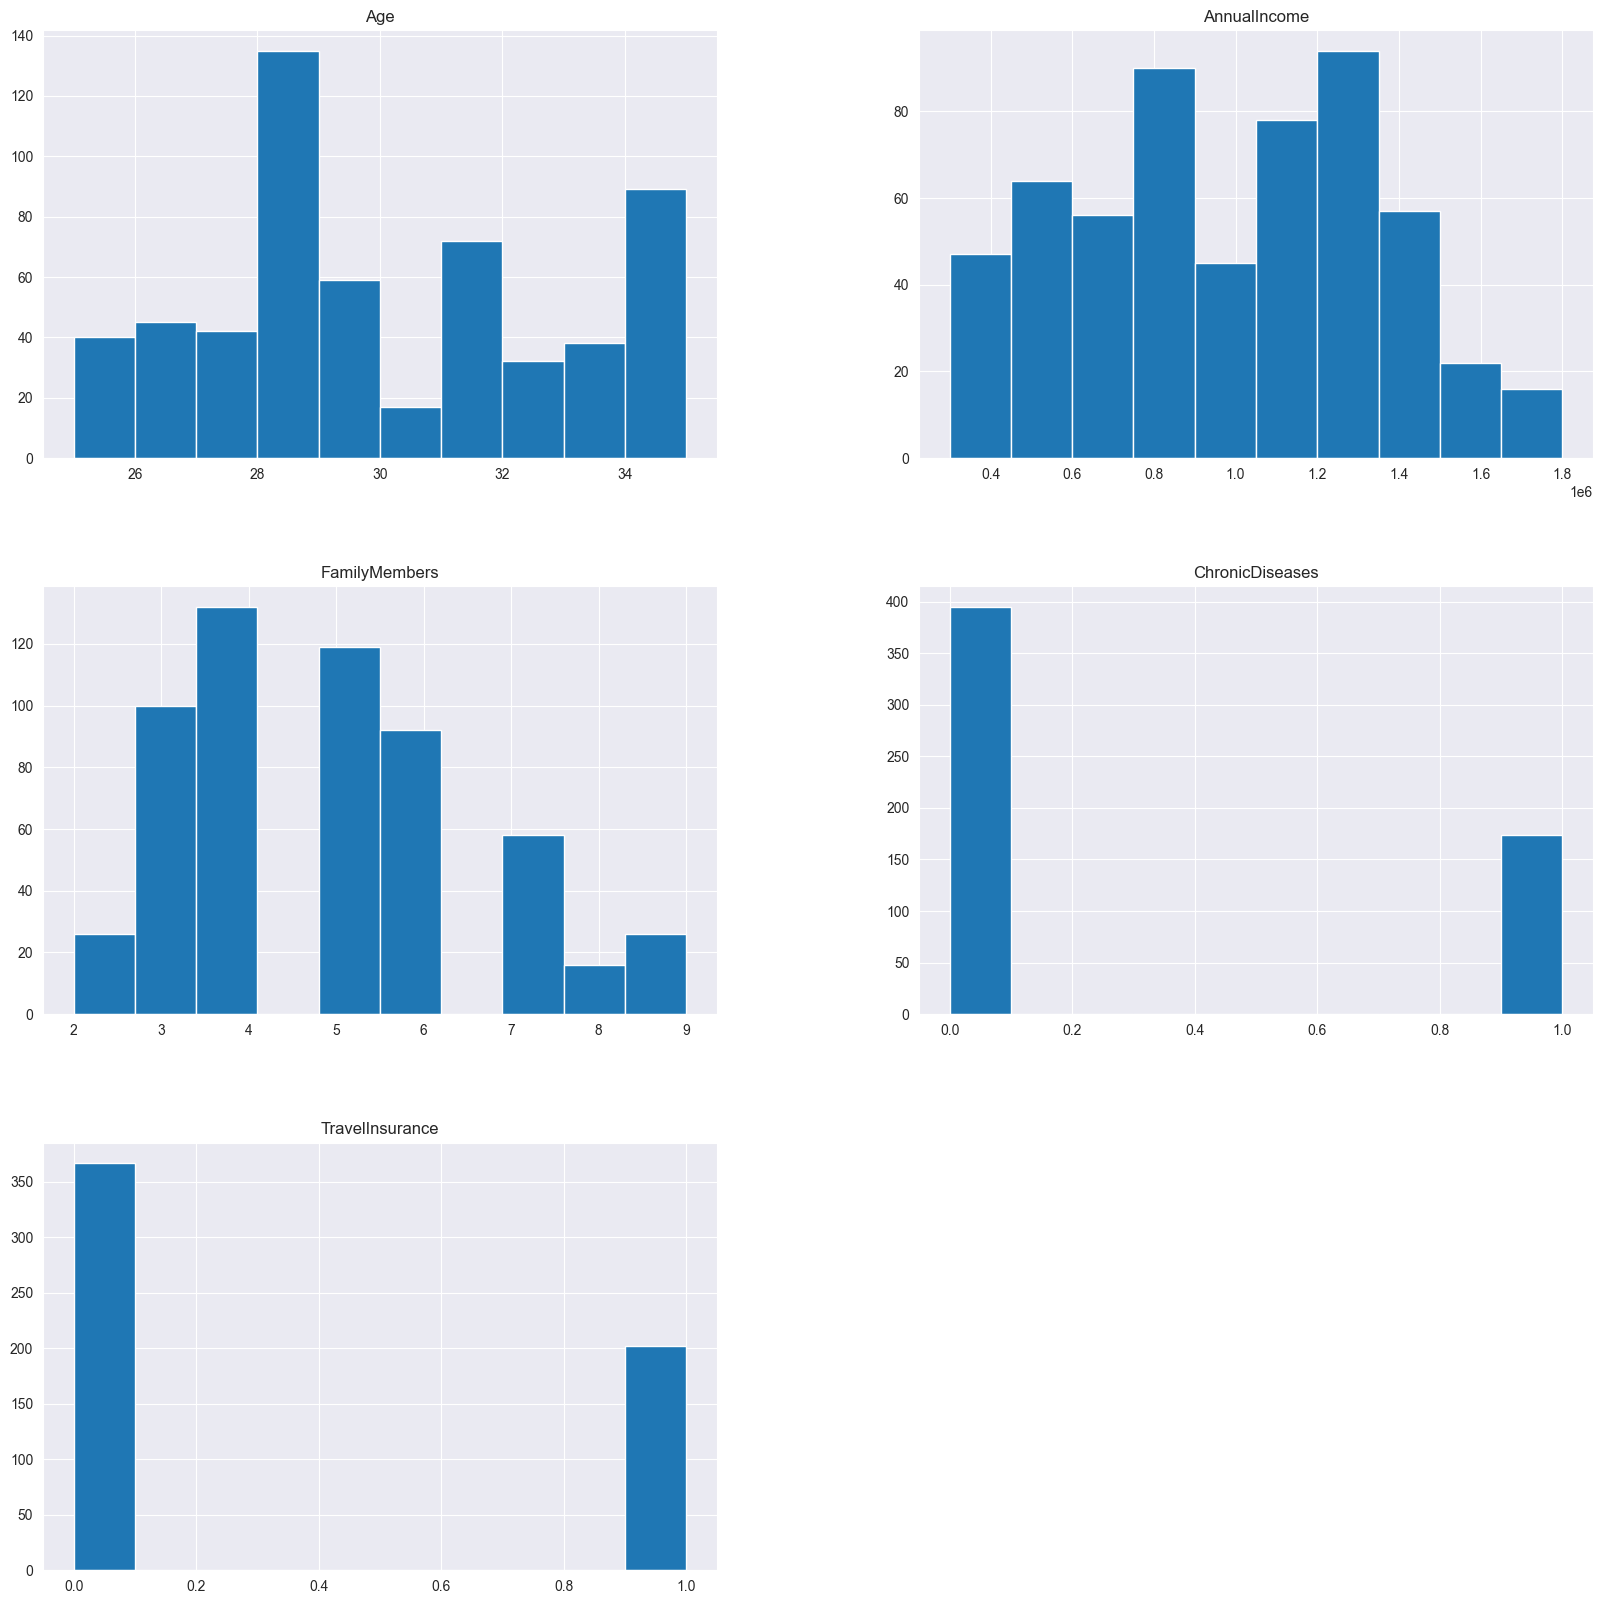

In [9]:
data.hist(figsize=(20, 20))

28    23.725835
31    12.653779
34    12.653779
29    10.369069
26     7.908612
27     7.381371
25     7.029877
33     6.678383
32     5.623902
35     2.987698
30     2.987698
Name: Age, dtype: float64

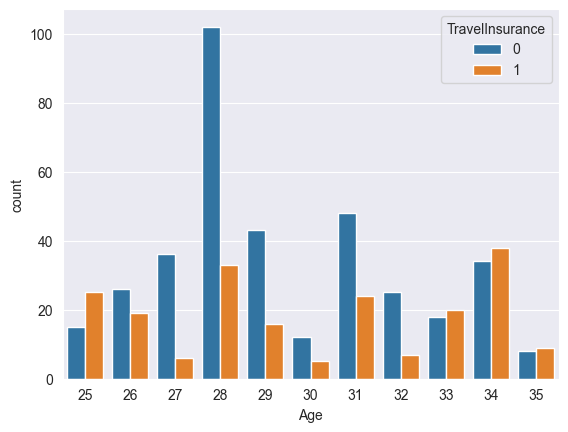

In [11]:
sns.countplot(x = data['Age'], hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
#pd.set_option('display.precision', 0)
#pd.options.display.float_format = "{:,.2f}".format
#fmt='.2f'
data['Age'].value_counts(normalize=True)*100

Yes    84.885764
No     15.114236
Name: GraduateOrNot, dtype: float64

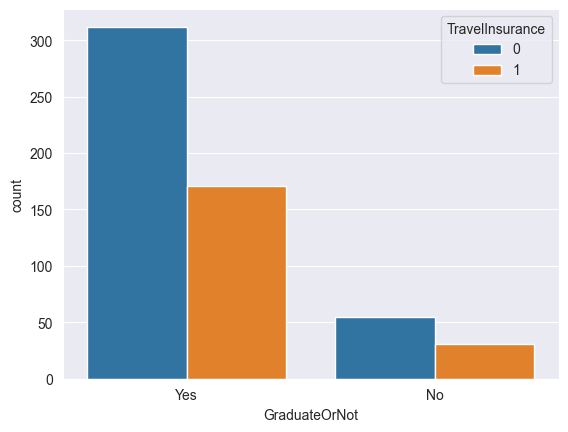

In [12]:
sns.countplot(x = data['GraduateOrNot'],hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
data['GraduateOrNot'].value_counts(normalize=True)*100

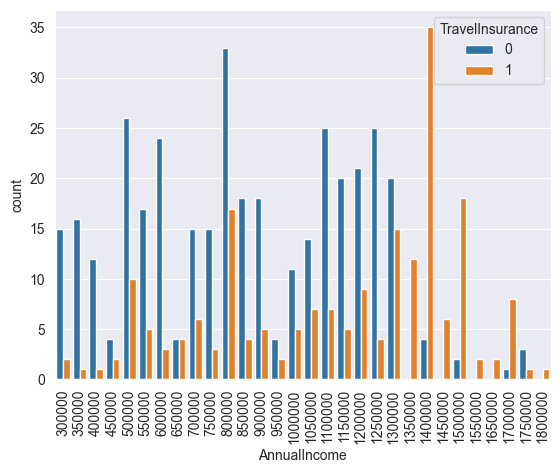

800000     8.787346
1400000    6.854130
500000     6.326889
1300000    6.151142
1100000    5.623902
1200000    5.272408
1250000    5.096661
600000     4.745167
1150000    4.393673
900000     4.042179
850000     3.866432
550000     3.866432
1050000    3.690685
700000     3.690685
1500000    3.514938
750000     3.163445
350000     2.987698
300000     2.987698
1000000    2.811951
400000     2.284710
1350000    2.108963
1700000    1.581722
650000     1.405975
1450000    1.054482
950000     1.054482
450000     1.054482
1750000    0.702988
1650000    0.351494
1550000    0.351494
1800000    0.175747
Name: AnnualIncome, dtype: float64

In [13]:
sns.countplot(x = data['AnnualIncome'],hue=data['TravelInsurance'])
plt.xticks(rotation = 90)
plt.show()
# структура по колонке x, выраженная в %
data['AnnualIncome'].value_counts(normalize=True)*100

4    23.198594
5    20.913884
3    17.574692
6    16.168717
7    10.193322
9     4.569420
2     4.569420
8     2.811951
Name: FamilyMembers, dtype: float64

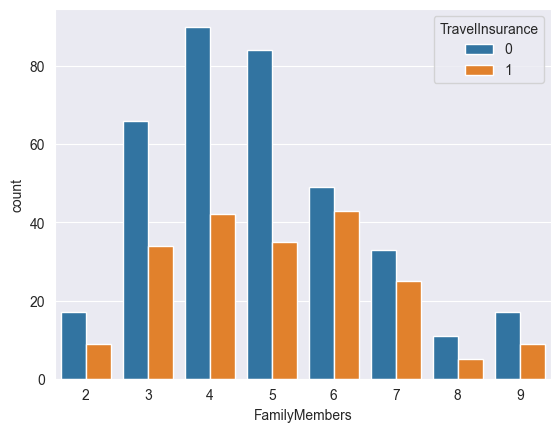

In [14]:
sns.countplot(x = data['FamilyMembers'],hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
data['FamilyMembers'].value_counts(normalize=True)*100

0    69.420035
1    30.579965
Name: ChronicDiseases, dtype: float64

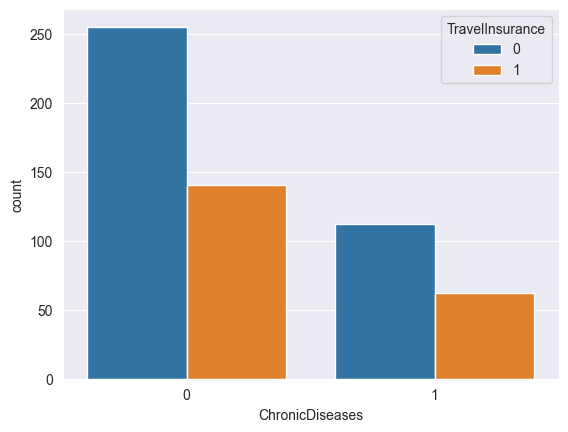

In [15]:
sns.countplot(x = data['ChronicDiseases'],hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
data['ChronicDiseases'].value_counts(normalize=True)*100

No     77.328647
Yes    22.671353
Name: FrequentFlyer, dtype: float64

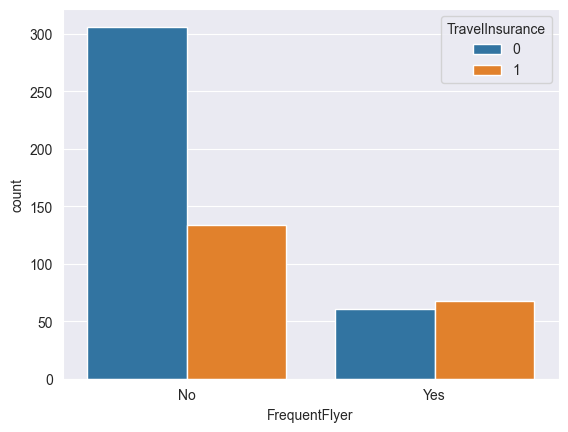

In [16]:
sns.countplot(x = data['FrequentFlyer'],hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
data['FrequentFlyer'].value_counts(normalize=True)*100

No     80.316344
Yes    19.683656
Name: EverTravelledAbroad, dtype: float64

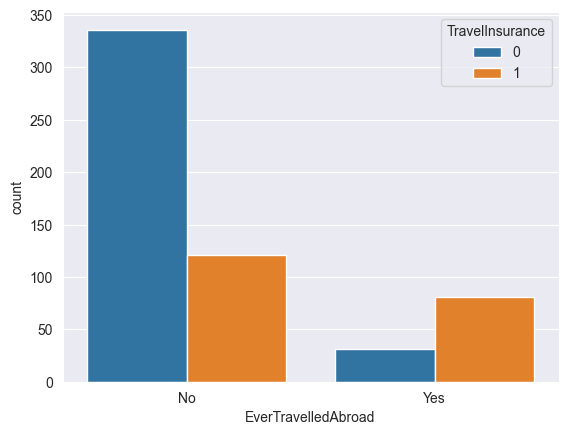

In [17]:
sns.countplot(x = data['EverTravelledAbroad'],hue=data['TravelInsurance'])
data['EverTravelledAbroad'].value_counts(normalize=True)*100

Private Sector/Self Employed    73.813708
Government Sector               26.186292
Name: Employment Type, dtype: float64

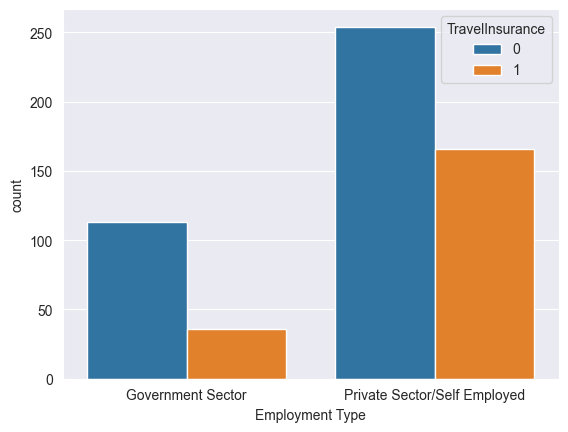

In [18]:
sns.countplot(x = data['Employment Type'],hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
data['Employment Type'].value_counts(normalize=True)*100

0    64.499121
1    35.500879
Name: TravelInsurance, dtype: float64

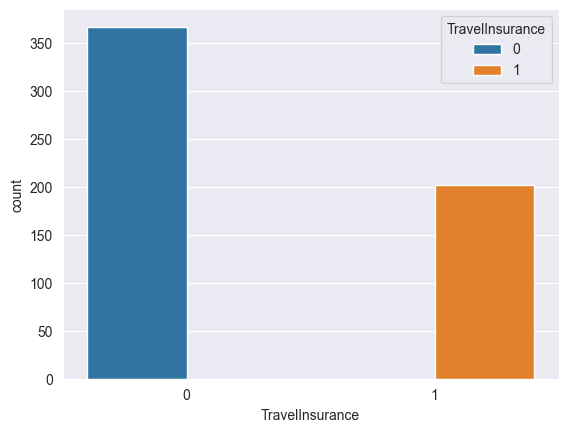

In [19]:
sns.countplot(x = data['TravelInsurance'],hue=data['TravelInsurance'])
# структура по колонке x, выраженная в %
data['TravelInsurance'].value_counts(normalize=True)*100

In [20]:
fig = px.histogram(data, x='Age', color='TravelInsurance', marginal = 'box')
fig.show()

In [21]:
fig = px.histogram(data, x='AnnualIncome', color='TravelInsurance', marginal = 'box')
fig.show()

In [22]:
fig = px.histogram(data, x='FamilyMembers', color='TravelInsurance', marginal = 'box')
fig.show()

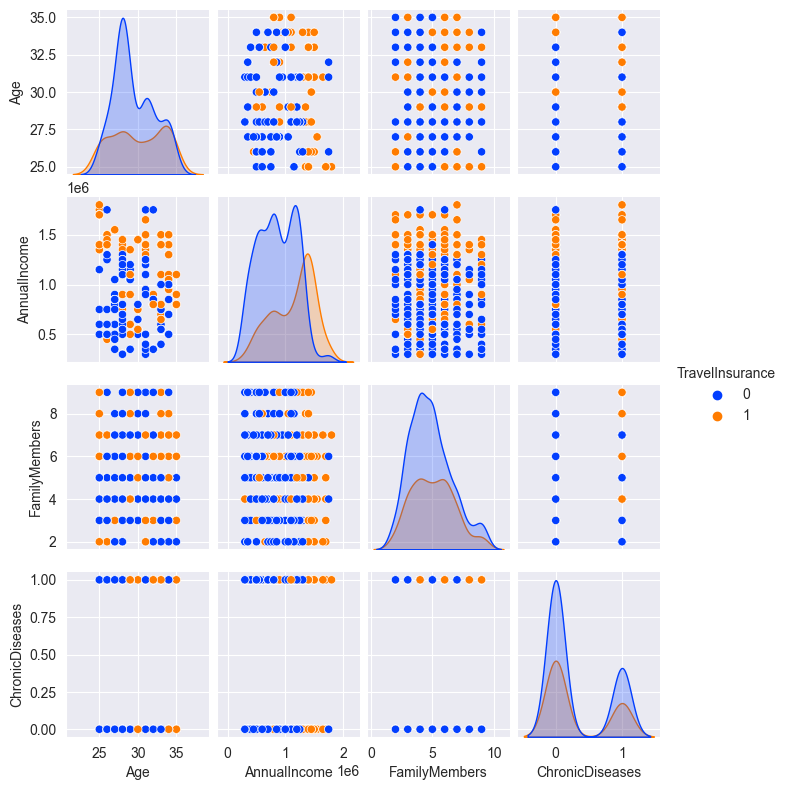

In [23]:
sns.pairplot(data, aspect=.85, hue='TravelInsurance', height=2, palette='bright')

In [24]:
data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

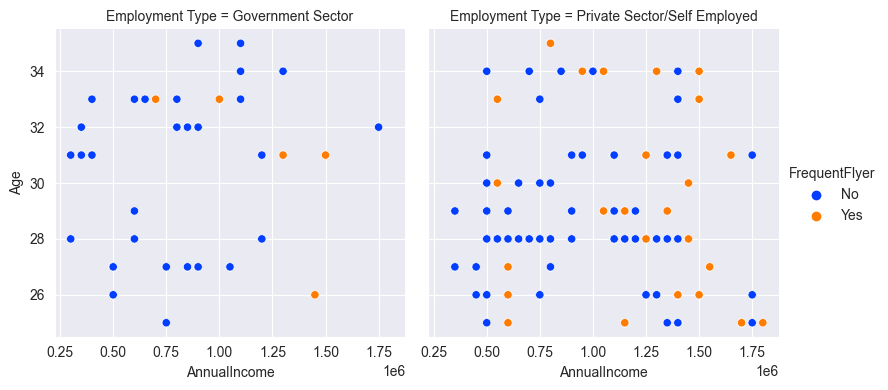

In [25]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='FrequentFlyer', col='Employment Type', palette='bright', height=4)

Выводы:
1. Сотрудников государственного сектора в датасете меньше
2. Чаще совершают полеты сотрудники негосударственного сектора
3. И в частном, и в государственном секторе ежегодный доход не зависит от возраста. 

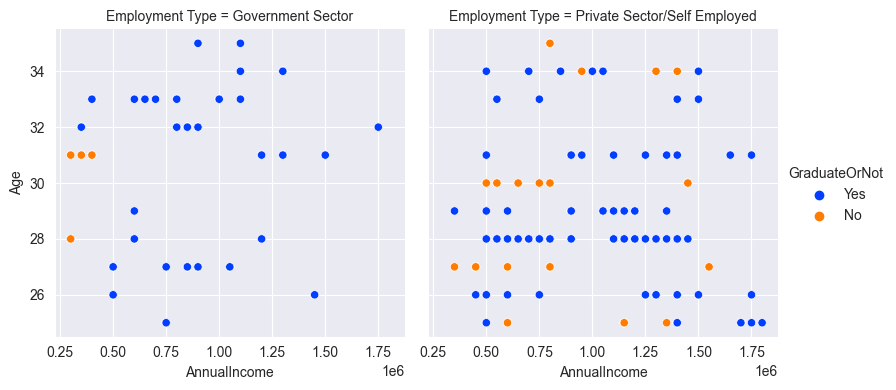

In [26]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='GraduateOrNot', col='Employment Type', palette='bright', height=4)

Выводы:
1. В государственных компаниям работают преимущественно люди с высшим образованием
2. В негосударственных компаниях допускаются работники вне зависимости от наличия образования

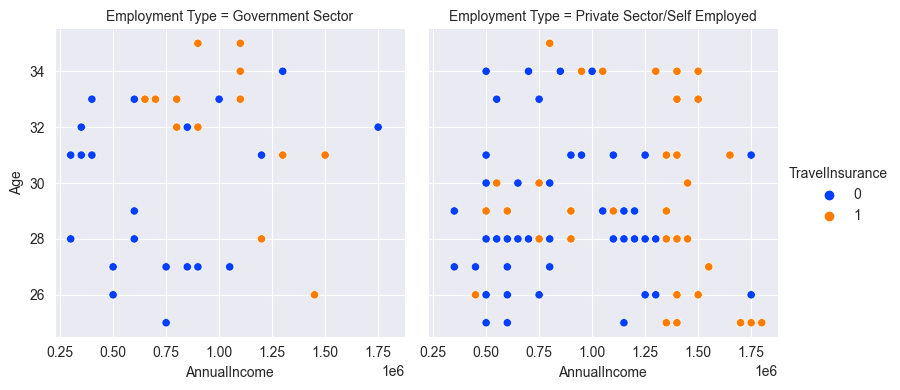

In [27]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='TravelInsurance', col='Employment Type', palette='bright', height=4)

Выводы:
1. В государственных компаниях страховку в основном покупают более возрастные люди с более высоким доходом.
2. В негосударственных компаниях страховку чаще покупают люди с более высоким доходом вне зависимости от возраста.

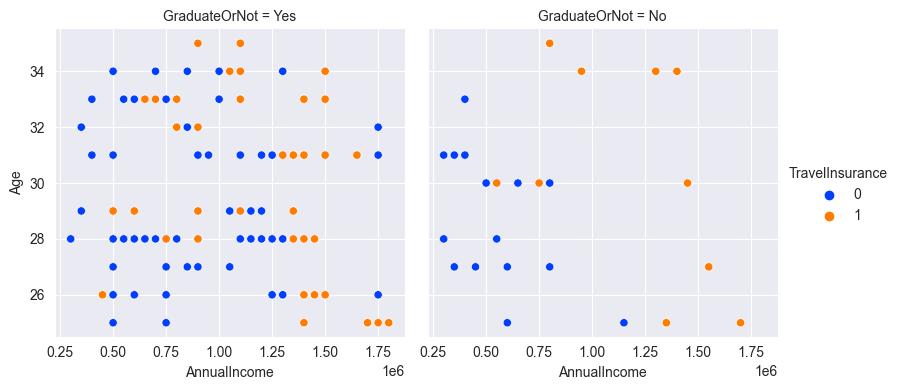

In [28]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='TravelInsurance', col='GraduateOrNot', palette='bright', height=4)

Выводы:
1. Страховку значительно чаще покупают образованные люди
2. Среди тех, кто не имеет высшего образования, страховку чаще покупают люди с более высоким доходом

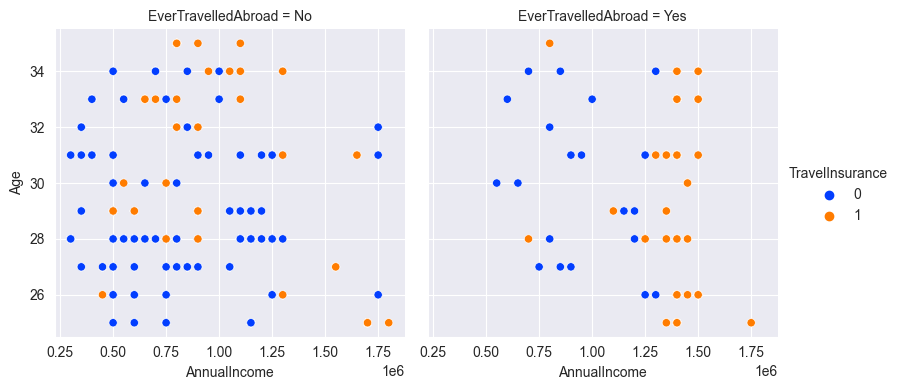

In [29]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='TravelInsurance', col='EverTravelledAbroad', palette='bright', height=4)

Выводы:
1. В датасете больше людей, которые путешествуют заграницу.
2. Среди тех, кто путешествует внутри страны, страховку чаще покупают люди с высоким доходом. 

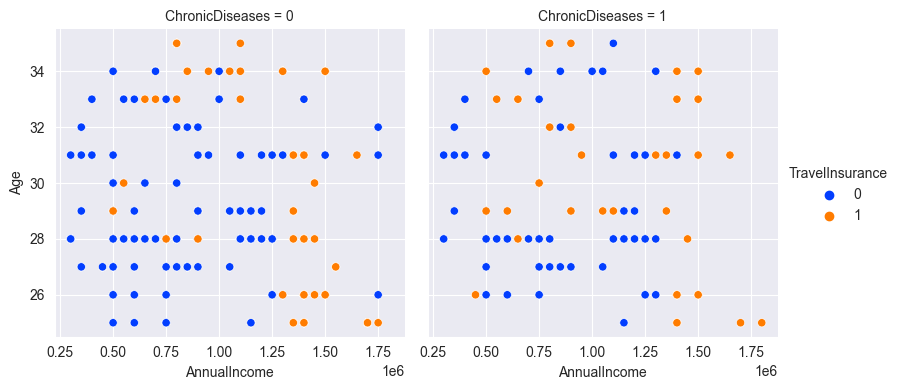

In [30]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='TravelInsurance', col='ChronicDiseases', palette='bright', height=4)

Выводы:
Страховку покупают вне зависимости от наличия или отсутствия хронических заболеваний

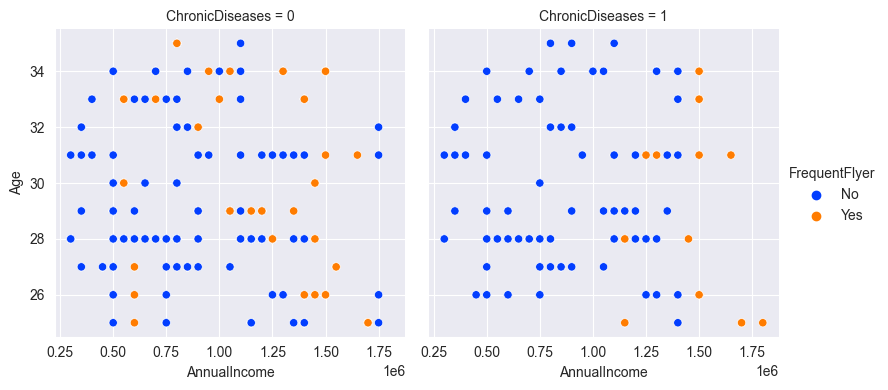

In [31]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='FrequentFlyer', col='ChronicDiseases', palette='bright', height=4)

Выводы:
1. Люди с хроническими заболеваниями в основном не прибегают к услугам авиакомпаний, летают лишь при высоком уровне дохода.

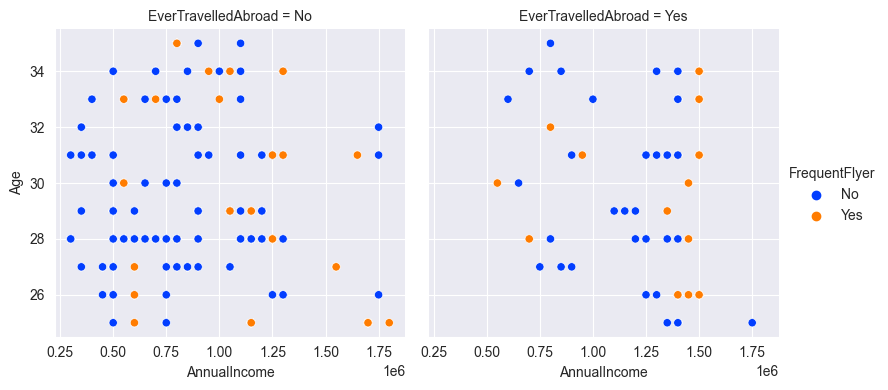

In [32]:
sns.relplot(data=data, x='AnnualIncome', y='Age', hue='FrequentFlyer', col='EverTravelledAbroad', palette='bright', height=4)

Выводы:
1. В датасете больше людей, которые не путешествуют за пределы страны

In [33]:
data.corr()

Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
Age              1.000000     -0.025729       0.012310         0.044723   
AnnualIncome    -0.025729      1.000000      -0.011348         0.000503   
FamilyMembers    0.012310     -0.011348       1.000000         0.049995   
ChronicDiseases  0.044723      0.000503       0.049995         1.000000   
TravelInsurance  0.088164      0.372444       0.053452         0.001821   

                 TravelInsurance  
Age                     0.088164  
AnnualIncome            0.372444  
FamilyMembers           0.053452  
ChronicDiseases         0.001821  
TravelInsurance         1.000000

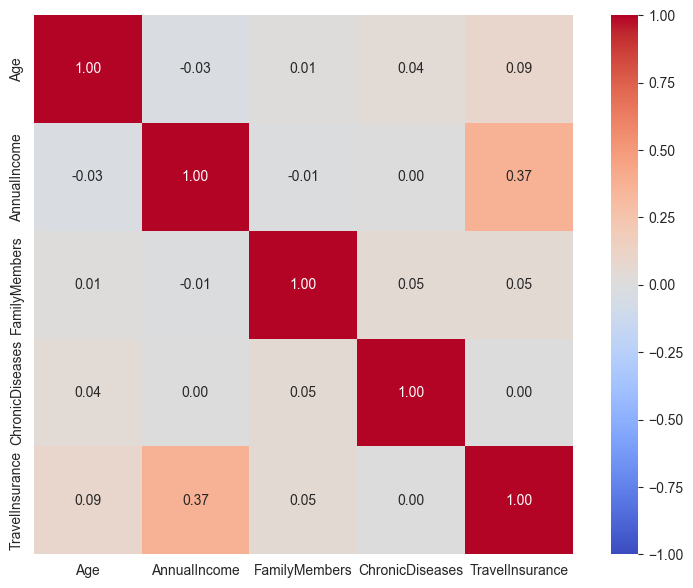

In [34]:
plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

Выводы:
1. Корреляция между признаками низкая
2. Единственный признак, корреляция которого сильно отличается от остальных, это: покупка страховки в зависимости от ежегодного дохода

### Работа с категориальными признаками

In [35]:
data['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
data['GraduateOrNot'] = data['GraduateOrNot'].apply(lambda x: 1 if x=='Yes' else 0)

In [37]:
data['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
data['FrequentFlyer'] = data['FrequentFlyer'].apply(lambda x: 1 if x=='Yes' else 0)

In [39]:
data['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
data['EverTravelledAbroad'] = data['EverTravelledAbroad'].apply(lambda x: 1 if x=='Yes' else 0)

In [41]:
data['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [42]:
print(data['Employment Type']. value_counts ()['Government Sector'])
print(data['Employment Type']. value_counts ()['Private Sector/Self Employed'])

149
420


In [43]:
from category_encoders import OneHotEncoder

enc = OneHotEncoder()
enc.fit_transform(data[['Employment Type']]).head()

Employment Type_1  Employment Type_2
0                  1                  0
1                  0                  1
2                  0                  1
3                  0                  1
4                  0                  1

In [44]:
data = data.drop(['Employment Type'], axis = 1).join(enc.fit_transform(data[['Employment Type']], axis = 0))
data.head()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  \
0   31              1        400000              6                1   
1   31              1       1250000              7                0   
2   34              1        500000              4                1   
3   28              1        700000              3                1   
4   28              1        700000              8                1   

   FrequentFlyer  EverTravelledAbroad  TravelInsurance  Employment Type_1  \
0              0                    0                0                  1   
1              0                    0                0                  0   
2              0                    0                1                  0   
3              0                    0                0                  0   
4              1                    0                0                  0   

   Employment Type_2  
0                  0  
1                  1  
2                  1  
3                  1  
4                  1

In [45]:
data.describe()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
count  569.000000     569.000000  5.690000e+02     569.000000   
mean    29.627417       0.848858  9.551845e+05       4.912127   
std      2.887873       0.358503  3.637326e+05       1.702115   
min     25.000000       0.000000  3.000000e+05       2.000000   
25%     28.000000       1.000000  6.500000e+05       4.000000   
50%     29.000000       1.000000  9.500000e+05       5.000000   
75%     32.000000       1.000000  1.250000e+06       6.000000   
max     35.000000       1.000000  1.800000e+06       9.000000   

       ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
count       569.000000     569.000000           569.000000       569.000000   
mean          0.305800       0.226714             0.196837         0.355009   
std           0.461151       0.419074             0.397958         0.478937   
min           0.000000       0.000000             0.000000         0.000000   
25%           0.000000       0.000000             0.000000         0.000000   
50%           0.000000       0.000000             0.000000         0.000000   
75%           1.000000       0.000000             0.000000         1.000000   
max           1.000000       1.000000             1.000000         1.000000   

       Employment Type_1  Employment Type_2  
count         569.000000         569.000000  
mean            0.261863           0.738137  
std             0.440035           0.440035  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             0.000000           1.000000  
75%             1.000000           1.000000  
max             1.000000           1.000000

In [46]:
data.corr()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
Age                  1.000000       0.039040     -0.025729       0.012310   
GraduateOrNot        0.039040       1.000000      0.117406      -0.001607   
AnnualIncome        -0.025729       0.117406      1.000000      -0.011348   
FamilyMembers        0.012310      -0.001607     -0.011348       1.000000   
ChronicDiseases      0.044723       0.077726      0.000503       0.049995   
FrequentFlyer       -0.017365      -0.041045      0.323180       0.000829   
EverTravelledAbroad  0.017968       0.060812      0.460596       0.002188   
TravelInsurance      0.088164      -0.004811      0.372444       0.053452   
Employment Type_1    0.151726       0.106247     -0.296140      -0.020936   
Employment Type_2   -0.151726      -0.106247      0.296140       0.020936   

                     ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
Age                         0.044723      -0.017365             0.017968   
GraduateOrNot               0.077726      -0.041045             0.060812   
AnnualIncome                0.000503       0.323180             0.460596   
FamilyMembers               0.049995       0.000829             0.002188   
ChronicDiseases             1.000000      -0.095183             0.045573   
FrequentFlyer              -0.095183       1.000000             0.196438   
EverTravelledAbroad         0.045573       0.196438             1.000000   
TravelInsurance             0.001821       0.194765             0.380930   
Employment Type_1           0.029810      -0.169751            -0.144056   
Employment Type_2          -0.029810       0.169751             0.144056   

                     TravelInsurance  Employment Type_1  Employment Type_2  
Age                         0.088164           0.151726          -0.151726  
GraduateOrNot              -0.004811           0.106247          -0.106247  
AnnualIncome                0.372444          -0.296140           0.296140  
FamilyMembers               0.053452          -0.020936           0.020936  
ChronicDiseases             0.001821           0.029810          -0.029810  
FrequentFlyer               0.194765          -0.169751           0.169751  
EverTravelledAbroad         0.380930          -0.144056           0.144056  
TravelInsurance             1.000000          -0.141149           0.141149  
Employment Type_1          -0.141149           1.000000          -1.000000  
Employment Type_2           0.141149          -1.000000           1.000000

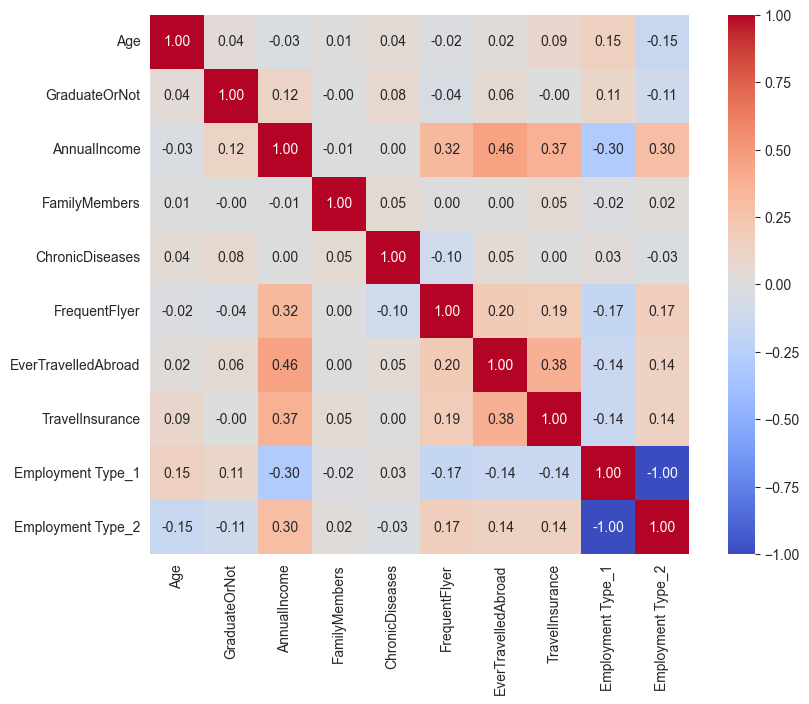

In [47]:
plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

### Работа с моделью

In [48]:
# разбиваем датасет

X = data.copy()
X.drop(['TravelInsurance'], axis=1, inplace=True)

In [49]:
y = data['TravelInsurance']

In [50]:
# нормализуем

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 9), (114, 9), (455,), (114,))

In [52]:
# обучаем модель методом knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
knn_predictions_y = knn.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [54]:
print("Train quality:")
quality_report(knn.predict(X_train), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test), y_test)

Train quality:
Accuracy: 0.778
Precision: 0.512
Recall: 0.838
f1_score: 0.635

Test quality:
Accuracy: 0.807
Precision: 0.433
Recall: 0.722
f1_score: 0.542


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, knn_predictions_y)
cm

array([[79,  5],
       [17, 13]], dtype=int64)

In [56]:
# roc_auc_score = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
# roc_auc_score

In [58]:
# строим ROC-AUC
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

def roc_auc(model, X_test, y_test ):
    y_scores = model.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, y_scores[:,1], pos_label = 1)
    roc_auc = metrics.auc(fpr, tpr)
    #print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

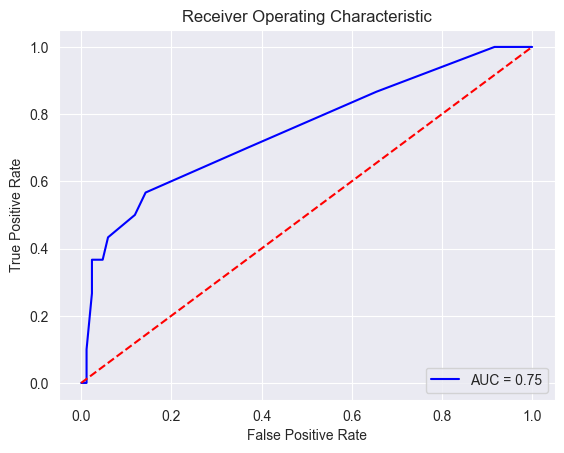

In [59]:
roc_auc(knn, X_test, y_test )

In [60]:
# Define GridSearch parameters
from sklearn.model_selection import GridSearchCV

def grid_optimization(model, parameters, X_train, y_train, X_test):
    gs = GridSearchCV(model,               # Classifier object to optimize
                      parameters,          # Grid of the hyperparameters
                      scoring='accuracy',  # Claasification quality metric to optimize
                      cv=5,                # Number of folds in KFolds cross-validation (CV)
                      n_jobs=-1, 
                      verbose=True
                     )

    # Run Grid Search optimization
    gs.fit(X_train, y_train)
    print('Best parameters: ', gs.best_params_)    
    print('Best Accuracy Through Grid Search : {:.3f}'.format(gs.best_score_))

In [61]:
knn = KNeighborsClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]}

grid_optimization(knn, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters:  {'n_neighbors': 13}
Best Accuracy Through Grid Search : 0.763


### Подберем гиперпараметры на кроссвалидации

In [62]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,30,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

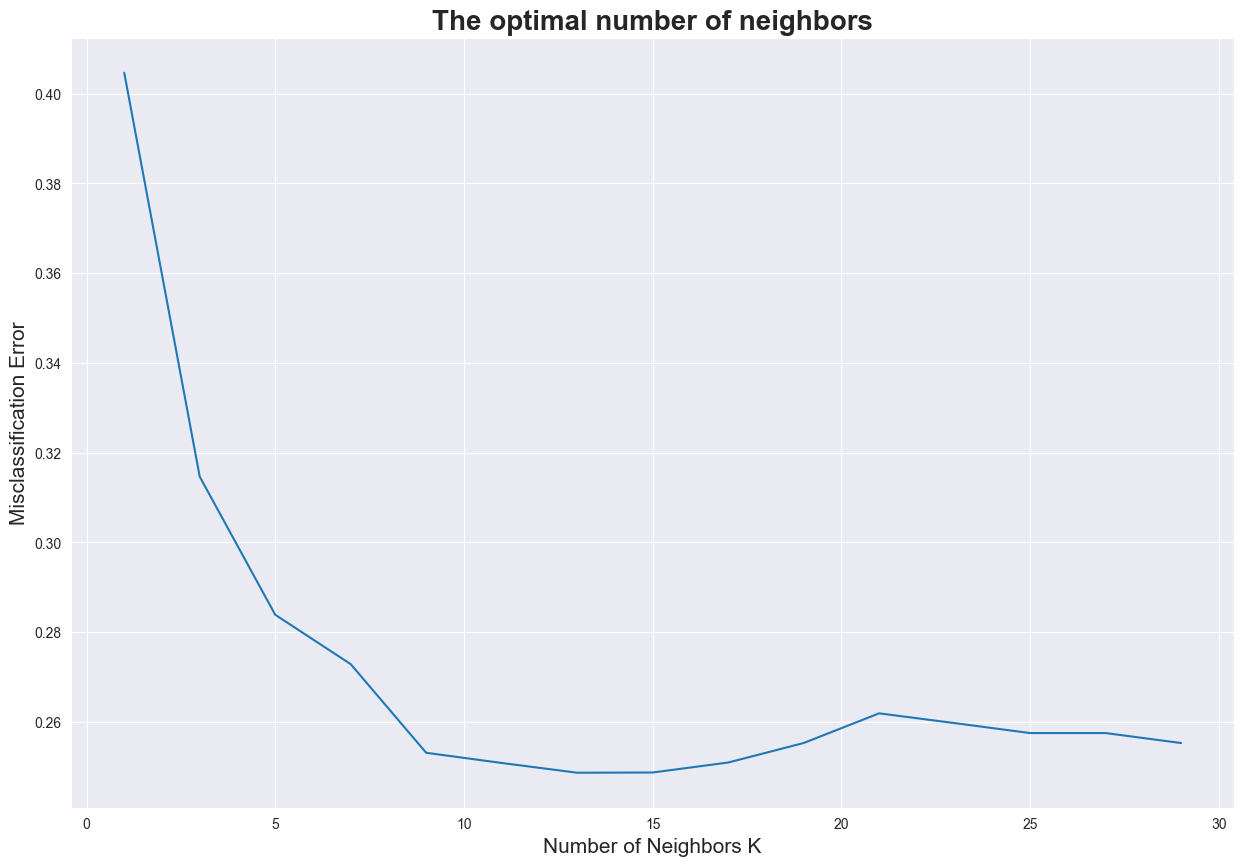

In [63]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [64]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 13.


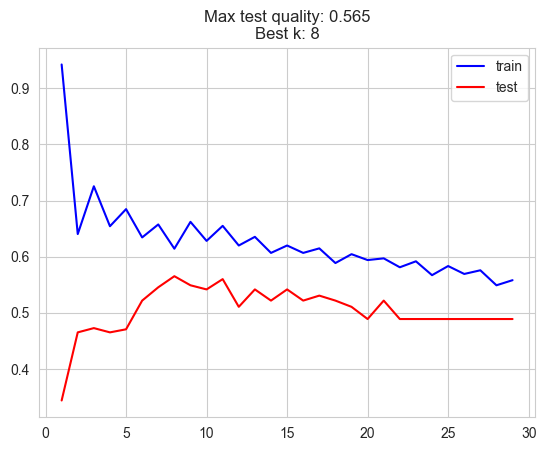

In [65]:
neighbors = range(1, 30)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

### Попробуем построить модель только из признаков с высокой корреляцией

In [66]:
k = 4
corrmat = data.corr()
cols = corrmat.nlargest(k, 'TravelInsurance')['TravelInsurance'].index.tolist()
cols

['TravelInsurance', 'EverTravelledAbroad', 'AnnualIncome', 'FrequentFlyer']

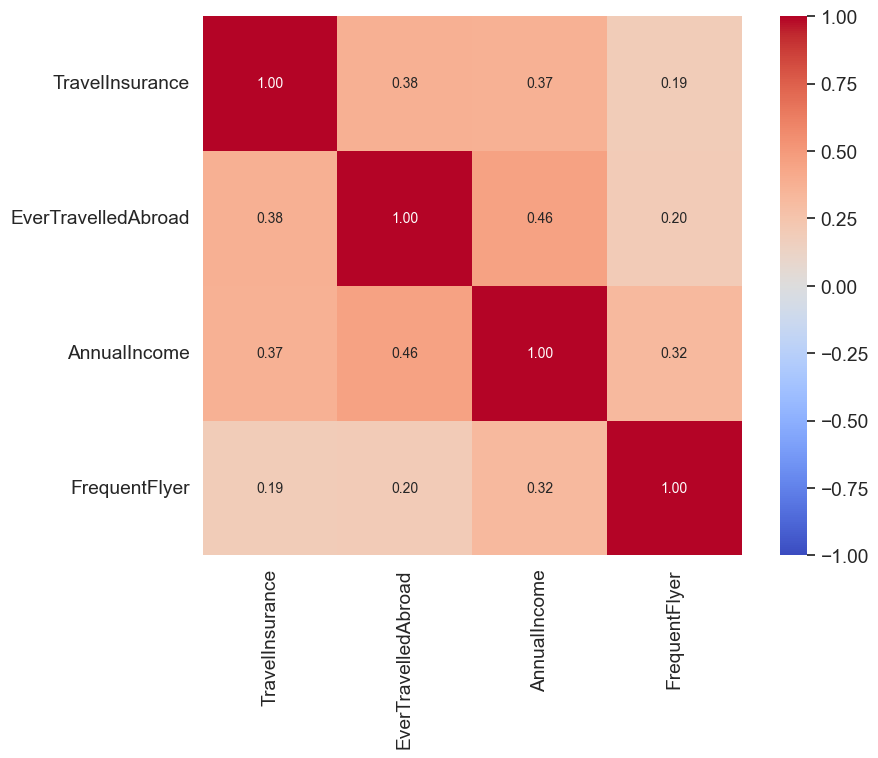

In [67]:
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

In [68]:
# Проверим какие данные берем в выборку: будем строить модель только на данных, обладающих высокой корреляцией с таргетом. 
features = list(data[cols])
print(features)

['TravelInsurance', 'EverTravelledAbroad', 'AnnualIncome', 'FrequentFlyer']


In [69]:
# Отфильтруем исходный дата сет по выбранным признакам
high_corr = data.copy()
X_high_corr = high_corr[features]
X_high_corr.drop(['TravelInsurance'], axis=1, inplace=True)

In [70]:
y_high_corr = data['TravelInsurance']

In [71]:
X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test = train_test_split(X_high_corr, y_high_corr, test_size = 0.2, random_state = 42)

scaler_high_corr = StandardScaler()
X_high_corr_train = scaler_high_corr.fit_transform(X_high_corr_train)
X_high_corr_test = scaler_high_corr.transform(X_high_corr_test)

In [72]:
knn_high_corr = KNeighborsClassifier(n_neighbors=8)
knn_high_corr.fit(X_high_corr_train, y_high_corr_train)
knn_high_corr_predictions_y = knn_high_corr.predict(X_high_corr_test)

In [73]:
print("Train quality:")
quality_report(knn_high_corr.predict(X_high_corr_train), y_high_corr_train)
print("\nTest quality:")
quality_report(knn_high_corr.predict(X_high_corr_test), y_high_corr_test)

Train quality:
Accuracy: 0.771
Precision: 0.459
Recall: 0.878
f1_score: 0.603

Test quality:
Accuracy: 0.825
Precision: 0.367
Recall: 0.917
f1_score: 0.524


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_high_corr_test, knn_high_corr_predictions_y)
cm

array([[83,  1],
       [19, 11]], dtype=int64)

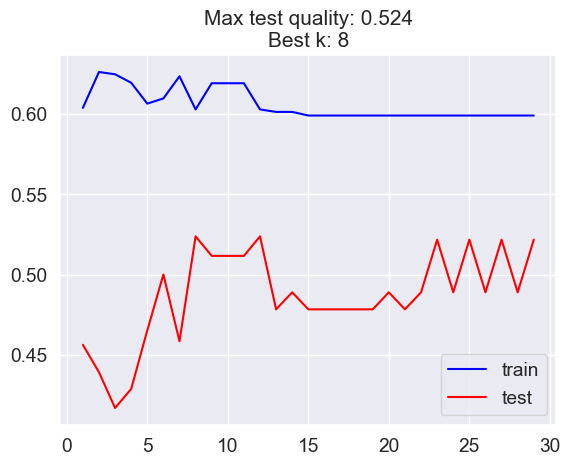

In [75]:
neighbors = range(1, 30)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn_high_corr = KNeighborsClassifier(n_neighbors=k)
    knn_high_corr.fit(X_high_corr_train, y_high_corr_train)
    f1_score_train.append(f1_score(knn_high_corr.predict(X_high_corr_train), y_high_corr_train))
    f1_score_test.append(f1_score(knn_high_corr.predict(X_high_corr_test), y_high_corr_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

### Вывод
Датасет, в котором только признаки с более высокой корреляцией, не дает преимуществ в модели. 

### Пробуем в исходном датасете удалить признаки без корреляции, остальные оставить

In [76]:
data_del_low_corr = data.copy()
data_del_low_corr.drop(['GraduateOrNot', 'ChronicDiseases'], axis=1, inplace=True)

In [77]:
X_del_low_corr = data_del_low_corr
X_del_low_corr.drop(['TravelInsurance'], axis=1, inplace=True)

In [78]:
y_del_low_corr = data['TravelInsurance']

In [79]:
X_del_low_corr_train, X_del_low_corr_test, y_del_low_corr_train, y_del_low_corr_test = train_test_split(X_del_low_corr, y_del_low_corr, test_size = 0.2, random_state = 42)

scaler_del_low = StandardScaler()
X_del_low_corr_train = scaler_del_low.fit_transform(X_del_low_corr_train)
X_del_low_corr_test = scaler_del_low.transform(X_del_low_corr_test)

In [80]:
knn_del_low_corr = KNeighborsClassifier(n_neighbors=22)
knn_del_low_corr.fit(X_del_low_corr_train, y_del_low_corr_train)
knn_del_low_corr_predictions_y = knn_del_low_corr.predict(X_del_low_corr_test)

In [81]:
print("Train quality:")
quality_report(knn_del_low_corr.predict(X_del_low_corr_train), y_del_low_corr_train)
print("\nTest quality:")
quality_report(knn_del_low_corr.predict(X_del_low_corr_test), y_del_low_corr_test)

Train quality:
Accuracy: 0.763
Precision: 0.488
Recall: 0.808
f1_score: 0.609

Test quality:
Accuracy: 0.816
Precision: 0.433
Recall: 0.765
f1_score: 0.553


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_del_low_corr_test, knn_del_low_corr_predictions_y)
cm

array([[80,  4],
       [17, 13]], dtype=int64)

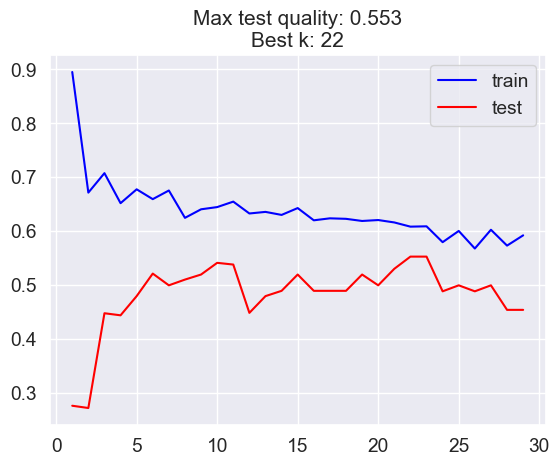

In [83]:
neighbors = range(1, 30)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn_del_low_corr = KNeighborsClassifier(n_neighbors=k)
    knn_del_low_corr.fit(X_del_low_corr_train, y_del_low_corr_train)
    f1_score_train.append(f1_score(knn_del_low_corr.predict(X_del_low_corr_train), y_del_low_corr_train))
    f1_score_test.append(f1_score(knn_del_low_corr.predict(X_del_low_corr_test), y_del_low_corr_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

### Вывод
Датасет без 2-х признаков с нулевой корреляцией также не дает более высокие метрики модели. 

### Логистическая регрессия

In [84]:
# Импортируем логистическую регрессию
from sklearn.linear_model import LogisticRegression
 
# создадим объект этого класса и запишем его в переменную model
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train, y_train)
lr_y_prediction = lr.predict(X_test)

In [85]:
print("Train quality:")
quality_report(lr.predict(X_train), y_train)
print("\nTest quality:")
quality_report(lr.predict(X_test), y_test)

Train quality:
Accuracy: 0.752
Precision: 0.506
Recall: 0.757
f1_score: 0.606

Test quality:
Accuracy: 0.798
Precision: 0.467
Recall: 0.667
f1_score: 0.549


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, lr_y_prediction)
cm

array([[77,  7],
       [16, 14]], dtype=int64)

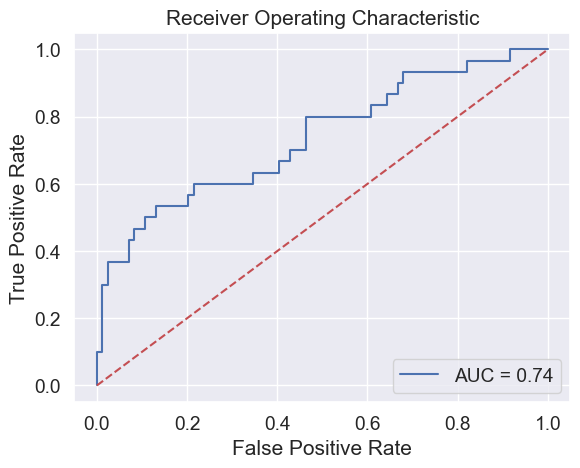

In [87]:
roc_auc(lr, X_test, y_test )

In [88]:
# Определим влияние коэффициентов на целевую переменную

featureImportance = pd.DataFrame({'feature': X.columns, 
                                  'importance': lr.coef_[0]})
featureImportance

feature  importance
0                  Age    0.185621
1        GraduateOrNot   -0.130502
2         AnnualIncome    0.621799
3        FamilyMembers    0.195288
4      ChronicDiseases   -0.006915
5        FrequentFlyer    0.133705
6  EverTravelledAbroad    0.515569
7    Employment Type_1   -0.055744
8    Employment Type_2    0.055744

<Axes: xlabel='feature'>

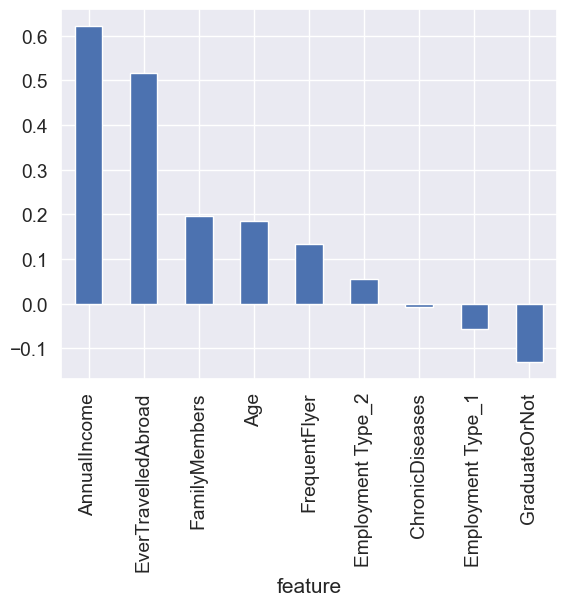

In [89]:
# Визуализируем влияние коэффициентов на целевую переменную

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot.bar()

In [90]:
# Регуляризация с L2
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.001, 0.01, 0.1, 1]}

model = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(model, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(X, data['TravelInsurance'])

GridSearchCV(cv=23, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='roc_auc')

In [91]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

param_C  mean_test_score
0   0.001         0.272227
1    0.01         0.272227
2     0.1         0.272227
3       1         0.272227

In [92]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 0.001} 	 Best score:  0.2722272544283414


In [93]:
# Регуляризация с L1
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

model = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf = GridSearchCV(model, parameters, scoring = 'roc_auc', cv = 23)
clf.fit(X, data['TravelInsurance'])

GridSearchCV(cv=23,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [94]:
pd.DataFrame(clf.cv_results_)[['param_C','mean_test_score']]

param_C  mean_test_score
0   0.001         0.414250
1    0.01         0.676121
2     0.1         0.687014
3       1         0.716757
4      10         0.727237
5     100         0.723973

In [95]:
print('Best C:', clf.best_params_, '\t Best score: ',clf.best_score_)

Best C: {'C': 10} 	 Best score:  0.7272368156199679


In [96]:
model_l2 = LogisticRegression(penalty = 'l2')

# Estimate grid of the classifier hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1]}

grid_optimization(model_l2, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters:  {'C': 0.01}
Best Accuracy Through Grid Search : 0.756


### Дерево решений

In [101]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=2, criterion='gini')
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

In [102]:
from platform import python_version

print(python_version())

3.11.1


In [103]:
from sklearn import tree

text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_2 <= 0.98
|   |--- feature_0 <= 0.97
|   |   |--- feature_2 <= 0.56
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.56
|   |   |   |--- class: 0
|   |--- feature_0 >  0.97
|   |   |--- feature_3 <= 0.33
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.33
|   |   |   |--- class: 1
|--- feature_2 >  0.98
|   |--- feature_0 <= 0.28
|   |   |--- feature_3 <= -0.82
|   |   |   |--- class: 1
|   |   |--- feature_3 >  -0.82
|   |   |   |--- class: 1
|   |--- feature_0 >  0.28
|   |   |--- feature_3 <= -0.82
|   |   |   |--- class: 1
|   |   |--- feature_3 >  -0.82
|   |   |   |--- class: 1



In [104]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names = list(X.columns))
print(tree_rules)

|--- AnnualIncome <= 0.98
|   |--- Age <= 0.97
|   |   |--- AnnualIncome <= 0.56
|   |   |   |--- class: 0
|   |   |--- AnnualIncome >  0.56
|   |   |   |--- class: 0
|   |--- Age >  0.97
|   |   |--- FamilyMembers <= 0.33
|   |   |   |--- class: 0
|   |   |--- FamilyMembers >  0.33
|   |   |   |--- class: 1
|--- AnnualIncome >  0.98
|   |--- Age <= 0.28
|   |   |--- FamilyMembers <= -0.82
|   |   |   |--- class: 1
|   |   |--- FamilyMembers >  -0.82
|   |   |   |--- class: 1
|   |--- Age >  0.28
|   |   |--- FamilyMembers <= -0.82
|   |   |   |--- class: 1
|   |   |--- FamilyMembers >  -0.82
|   |   |   |--- class: 1



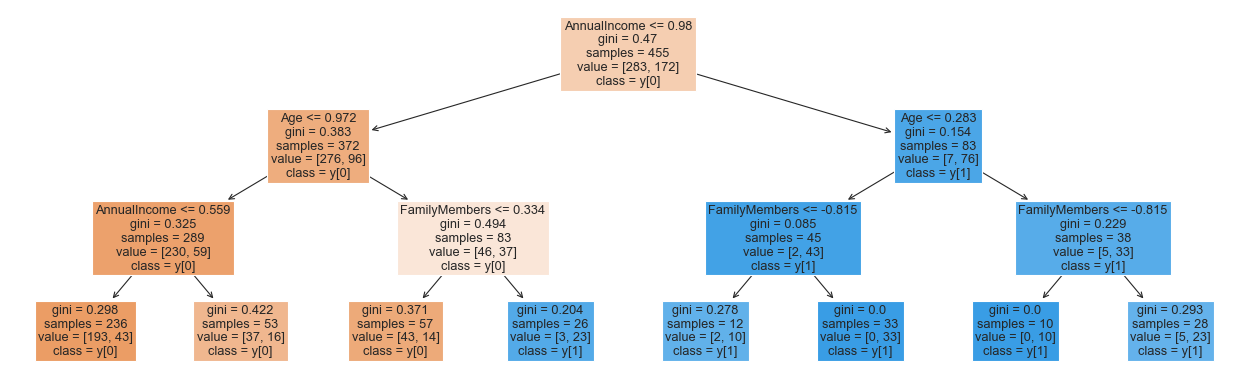

In [105]:
fig = plt.figure(figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names=True,
                   filled=True)

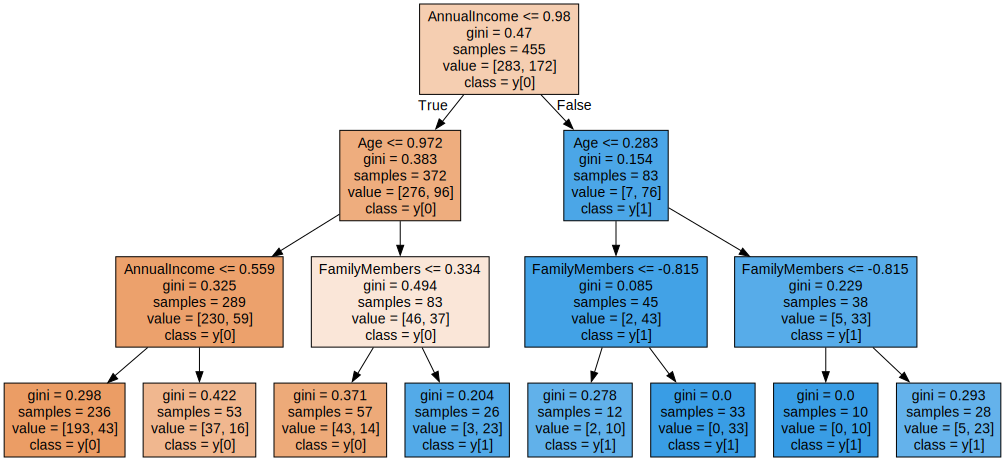

In [106]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [107]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

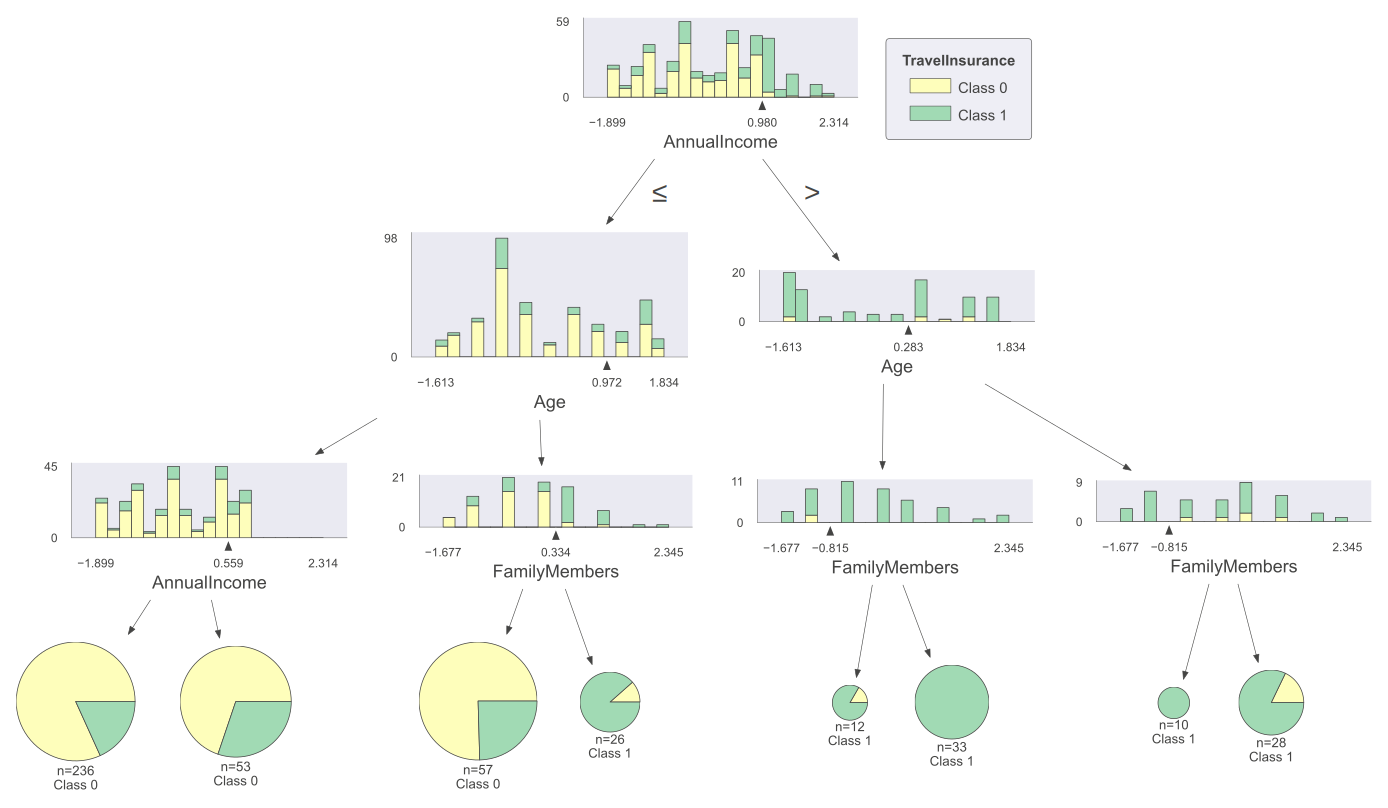

In [108]:
from dtreeviz import *
from dtreeviz.models.shadow_decision_tree import ShadowDecTree

shadow_tree = ShadowDecTree.get_shadow_tree(dt,X_train, y_train, feature_names = list(X.columns), target_name='TravelInsurance')
model = DTreeVizAPI(shadow_tree)
model.view(scale=2.0)

#model.save("foobar.svg")


# model.shadow_tree.predict_path(None)

# # from dtreeviz.trees import dtreeviz # remember to load the package
# # from dtreeviz.trees import *
# # import dtreeviz
# viz = dtreeviz(dt, X, y,
#                 target_name='TravelInsurance',
#                 feature_names=list(X.columns),
#                 class_names=True)
# viz.view()

# viz = dtreeviz(surrogate_explainer.estimator_,
#                    X_train,
#                    Y_train,
#                    target_name='label',
#                    feature_names=features,
#                    orientat'int' object is not subscriptableion="TD",
#                    class_names=list(surrogate_explainer.class_names),
#                    fancy=True,
#                    X=None,
#                    label_fontsize=12,
#                    ticks_fontsize=8,
#                    fontname="Arial")
# name = create_unique_name("skater_plot.svg");
# viz.save(name)


In [109]:
from sklearn.tree import export_graphviz
import os, graphviz,pydotplus

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
def plot_tree(model, cols, fname='temp_tree.png'):
    dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=cols, out_file=None)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.write_png(fname)
    img = plt.imread(fname)
    plt.imshow(img)

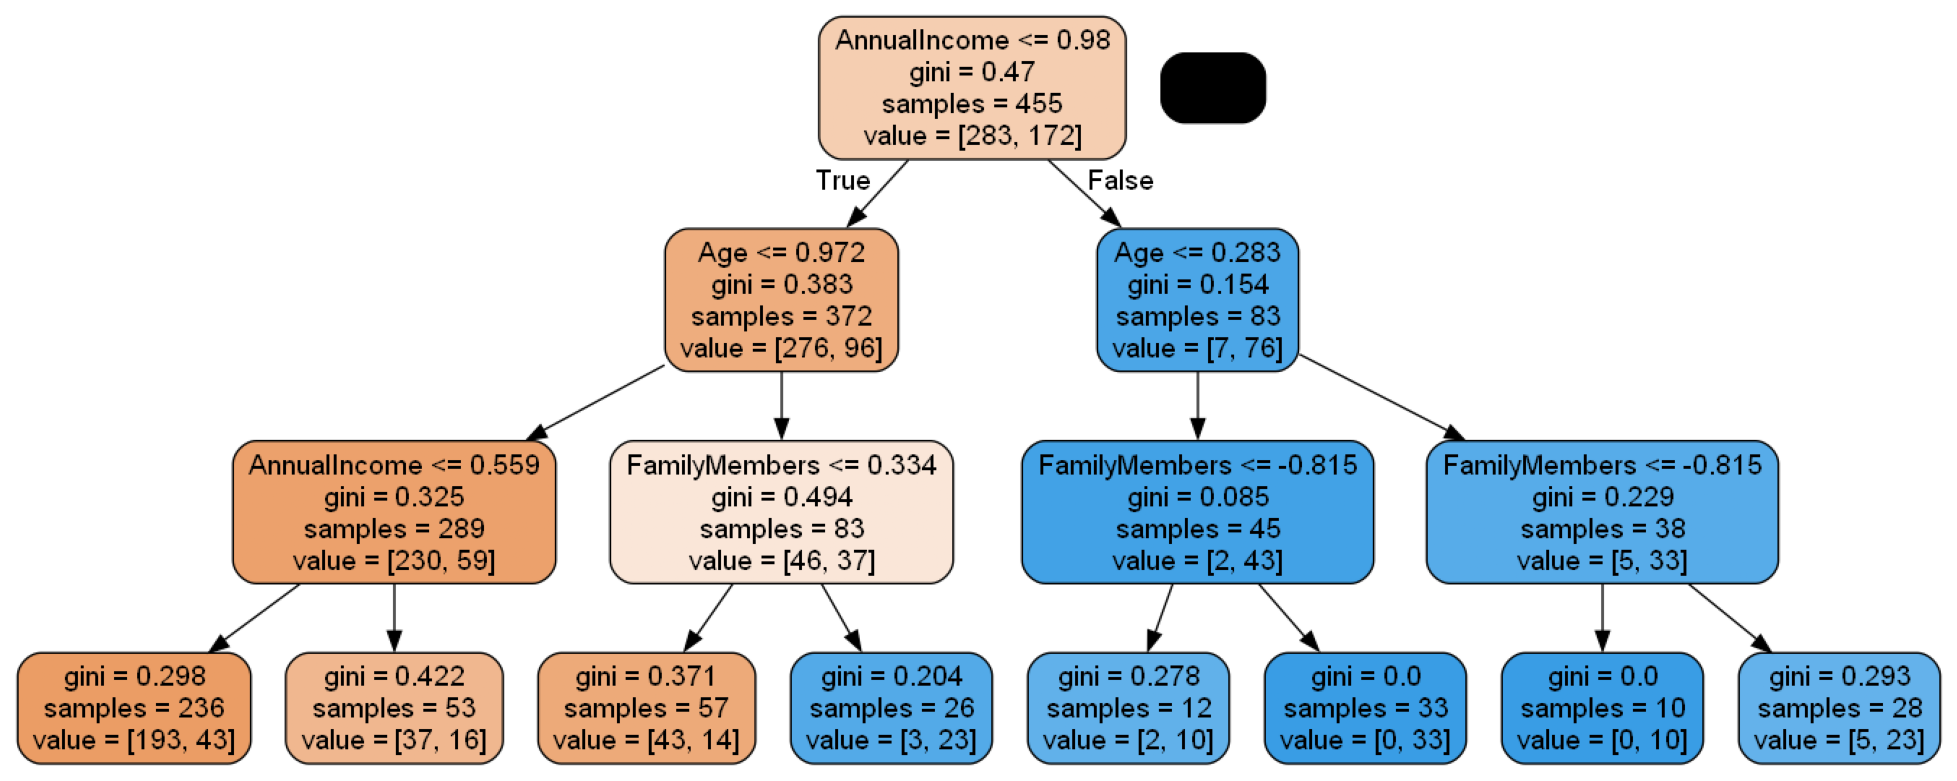

In [110]:
#clf = DecisionTreeClassifier(max_depth=4, criterion='gini')
#clf.fit(X_train, y_train)
plt.figure(figsize=(25, 25))
plt.axis('off')
plot_tree(dt, list(X.columns))
#pred = clf.predict(X_test)
#print(classification_report(y_test, pred))

In [111]:
print("Train quality:")
quality_report(dt.predict(X_train), y_train)
print("\nTest quality:")
quality_report(dt.predict(X_test), y_test)

Train quality:
Accuracy: 0.818
Precision: 0.576
Recall: 0.908
f1_score: 0.705

Test quality:
Accuracy: 0.816
Precision: 0.467
Recall: 0.737
f1_score: 0.571


In [112]:
cm = confusion_matrix(y_test, dt_y_pred)
cm

array([[79,  5],
       [16, 14]], dtype=int64)

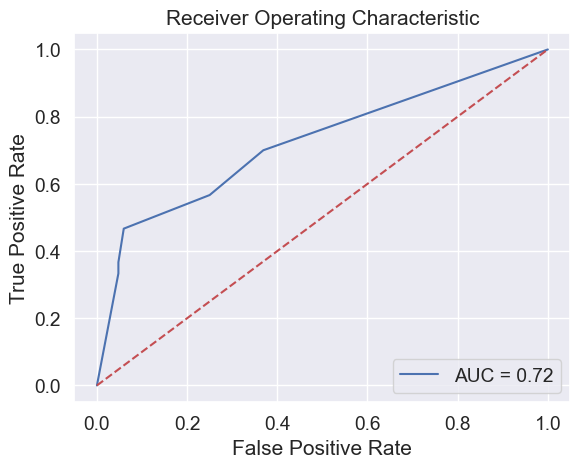

In [113]:
roc_auc(dt, X_test, y_test )

In [114]:
dt.feature_importances_

array([0.09413238, 0.        , 0.71933595, 0.18653168, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [115]:
pd.DataFrame(dt.feature_importances_, index = list(X.columns), columns = ['feature importance']).sort_values('feature importance', ascending = False)

feature importance
AnnualIncome                   0.719336
FamilyMembers                  0.186532
Age                            0.094132
GraduateOrNot                  0.000000
ChronicDiseases                0.000000
FrequentFlyer                  0.000000
EverTravelledAbroad            0.000000
Employment Type_1              0.000000
Employment Type_2              0.000000

In [112]:
dt = DecisionTreeClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 
              'min_samples_split' : [2,5,10,20],
              'min_samples_leaf':[1, 5, 10,50],
              'criterion' :['gini', 'entropy', 'log_loss']
             }

grid_optimization(dt, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Accuracy Through Grid Search : 0.818


In [116]:
# # Import GridSearchCV class
# from sklearn.model_selection import GridSearchCV

# # Define Decision Tree classifier with default parameters
# #dt = DecisionTreeClassifier()

# # Estimate grid of the classifier hyperparameters
# parameters = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 
#               'min_samples_split' : [2,5,10,20],
#               'min_samples_leaf':[1, 5, 10,50],
#               'criterion' :['gini', 'entropy', 'log_loss']
#              }

# # Define GridSearch parameters
# gs = GridSearchCV(dt,                  # Classifier object to optimize
#                   parameters,          # Grid of the hyperparameters
#                   scoring='accuracy',  # Claasification quality metric to optimize
#                   cv=5,                # Number of folds in KFolds cross-validation (CV)
#                   n_jobs=-1,
#                   verbose=True)                


# # Run Grid Search optimization
# gs.fit(X_train, y_train)
# gs.best_params_

In [198]:
# bagging
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1, n_estimators=350)
bagging_model.fit(X_train, y_train)
bagging_model_y_pred = bagging_model.predict(X_test)

In [194]:
print("Train quality:")
quality_report(bagging_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(bagging_model.predict(X_test), y_test)

Train quality:
Accuracy: 0.820
Precision: 0.576
Recall: 0.917
f1_score: 0.707

Test quality:
Accuracy: 0.816
Precision: 0.467
Recall: 0.737
f1_score: 0.571


In [199]:
cm = confusion_matrix(y_test, bagging_model_y_pred)
cm

array([[79,  5],
       [16, 14]], dtype=int64)

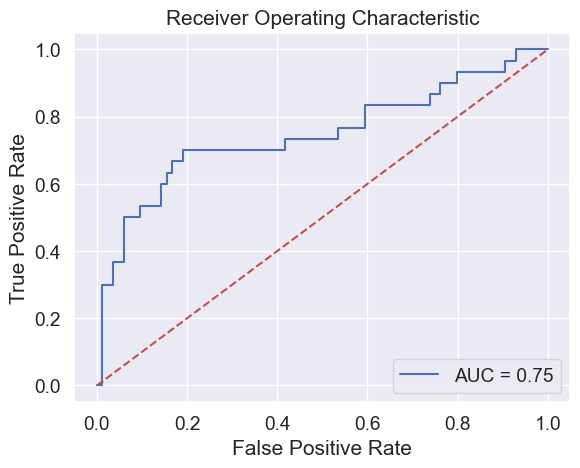

In [196]:
roc_auc(bagging_model, X_test, y_test )

### Random Forest

In [121]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth = 3, max_features = None, oob_score=True, 
                            min_samples_split = 3, min_samples_leaf = 5, bootstrap = True, criterion = 'log_loss')
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [122]:
print("Train quality:")
quality_report(rf.predict(X_train), y_train)
print("\nTest quality:")
quality_report(rf.predict(X_test), y_test)

Train quality:
Accuracy: 0.818
Precision: 0.576
Recall: 0.908
f1_score: 0.705

Test quality:
Accuracy: 0.816
Precision: 0.467
Recall: 0.737
f1_score: 0.571


In [123]:
cm = confusion_matrix(y_test, rf_y_pred)
cm

array([[79,  5],
       [16, 14]], dtype=int64)

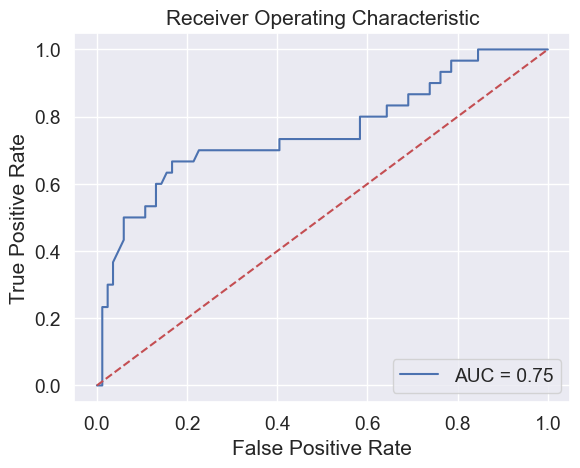

In [124]:
roc_auc(rf, X_test, y_test )

In [354]:
rf = RandomForestClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'n_estimators': [5,10,50, 100, 200, 300], 
              'max_features' : [None, 1, 3, 5, 7], 
              'max_depth':[None, 1, 2, 3, 4, 5, 6, 7], 
              'criterion': ['gini', 'entropy', 'log_loss'],
              'bootstrap': [True, False]
             }

grid_optimization(rf, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 5}
Best Accuracy Through Grid Search : 0.818


In [355]:
# parameters = {'n_estimators': [5,10,50, 100, 200, 300], 
#               'max_features' : [None, 1, 3, 5, 7], 
#               'max_depth':[None, 1, 2, 3, 4, 5, 6, 7], 
#               'criterion': ['gini', 'entropy', 'log_loss'],
#               'bootstrap': [True, False]
#              }

# rf = RandomForestClassifier()
# gs = GridSearchCV(rf, parameters, scoring = 'accuracy',  cv=5, n_jobs=-1, verbose=True)

# gs.fit(X_train, y_train)
# pred = gs.predict(X_test)
# print(f'Actual test score: {accuracy_score(pred, y_test):.4f}')
# print('Best parameters: ', gs.best_params_)

# #gs.fit(X_train, y_train)
# #gs.best_params_

### Градиентный бустинг

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=3, random_state=0, max_features = None)
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)

In [126]:
print("Train quality:")
quality_report(gb.predict(X_train), y_train)
print("\nTest quality:")
quality_report(gb.predict(X_test), y_test)

Train quality:
Accuracy: 0.842
Precision: 0.640
Recall: 0.917
f1_score: 0.753

Test quality:
Accuracy: 0.798
Precision: 0.533
Recall: 0.640
f1_score: 0.582


In [127]:
cm = confusion_matrix(y_test, gb_y_pred)
cm

array([[75,  9],
       [14, 16]], dtype=int64)

In [359]:
gb = GradientBoostingClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'max_depth':[1, 3, 5, 7, 10, None], 
              'n_estimators': [5,10,50, 100, 500]
             }

grid_optimization(gb, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'max_depth': 3, 'n_estimators': 5}
Best Accuracy Through Grid Search : 0.815


In [149]:
# # Import GridSearchCV class
# from sklearn.model_selection import GridSearchCV

# # Define Decision Tree classifier with default parameters
# gb = GradientBoostingClassifier()

# # Estimate grid of the classifier hyperparameters
# parameters = {'max_depth':[1, 3, 5, 7, 10, None], 
#               'n_estimators': [5,10,50, 100, 500]}

# # Define GridSearch parameters
# gs = GridSearchCV(gb,                 # Classifier object to optimize
#                   parameters,          # Grid of the hyperparameters
#                   scoring='accuracy',  # Claasification quality metric to optimize
#                   cv=5)                # Number of folds in KFolds cross-validation (CV)


# # Run Grid Search optimization
# gs.fit(X_train, y_train)
# gs.best_params_

In [128]:
from catboost import CatBoostClassifier 

#cb = CatBoostClassifier(iterations=70, random_seed=20, learning_rate=0.1, custom_loss='AUC', loss_function = 'CrossEntropy')
cb = CatBoostClassifier(iterations=10, learning_rate=0.5)
cb.fit(X_train, y_train)
cb_y_pred = cb.predict(X_test)

0:	learn: 0.5899828	total: 154ms	remaining: 1.39s
1:	learn: 0.5423782	total: 155ms	remaining: 621ms
2:	learn: 0.5143520	total: 156ms	remaining: 365ms
3:	learn: 0.4851990	total: 157ms	remaining: 236ms
4:	learn: 0.4768114	total: 158ms	remaining: 158ms
5:	learn: 0.4633683	total: 159ms	remaining: 106ms
6:	learn: 0.4565372	total: 160ms	remaining: 68.7ms
7:	learn: 0.4506429	total: 161ms	remaining: 40.3ms
8:	learn: 0.4460951	total: 163ms	remaining: 18.1ms
9:	learn: 0.4384246	total: 164ms	remaining: 0us


In [129]:
print("Train quality:")
quality_report(cb.predict(X_train), y_train)
print("\nTest quality:")
quality_report(cb.predict(X_test), y_test)

Train quality:
Accuracy: 0.822
Precision: 0.581
Recall: 0.917
f1_score: 0.712

Test quality:
Accuracy: 0.816
Precision: 0.467
Recall: 0.737
f1_score: 0.571


In [130]:
cm = confusion_matrix(y_test, cb_y_pred)
cm

array([[79,  5],
       [16, 14]], dtype=int64)

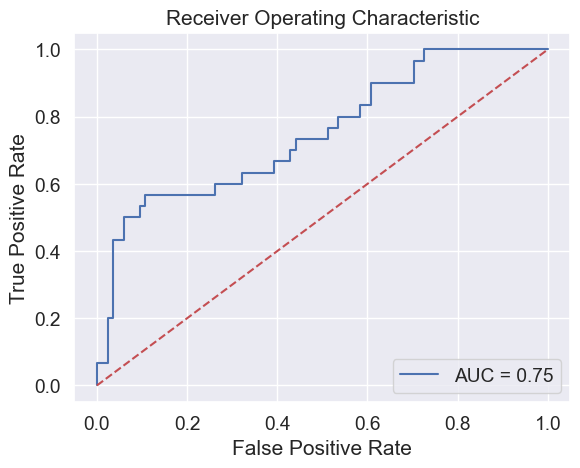

In [131]:
roc_auc(cb, X_test, y_test )

In [154]:
cb = CatBoostClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'iterations': [5,10,50, 70, 100], 
              'learning_rate':[0.01, 0.1, 0.15, 0.3, 0.5],
             }

grid_optimization(cb, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0:	learn: 0.5899828	total: 1.12ms	remaining: 10.1ms
1:	learn: 0.5423782	total: 2.21ms	remaining: 8.85ms
2:	learn: 0.5143520	total: 3.25ms	remaining: 7.57ms
3:	learn: 0.4851990	total: 4.34ms	remaining: 6.51ms
4:	learn: 0.4768114	total: 5.35ms	remaining: 5.35ms
5:	learn: 0.4633683	total: 6.31ms	remaining: 4.21ms
6:	learn: 0.4565372	total: 7.3ms	remaining: 3.13ms
7:	learn: 0.4506429	total: 8.26ms	remaining: 2.06ms
8:	learn: 0.4460951	total: 9.18ms	remaining: 1.02ms
9:	learn: 0.4384246	total: 10.1ms	remaining: 0us
Best parameters:  {'iterations': 10, 'learning_rate': 0.5}
Best Accuracy Through Grid Search : 0.813


In [155]:
# parameters = {'iterations': [5,10,50, 70, 100], 
#               'learning_rate':[0.01, 0.1, 0.15, 0.3, 0.5], 
#              }

# cb = CatBoostClassifier()
# gs = GridSearchCV(cb, parameters, scoring = 'accuracy',  cv=5, n_jobs=-1, verbose=True)

# gs.fit(X_train, y_train)
# pred = gs.predict(X_test)
# print(f'Actual test score: {accuracy_score(pred, y_test):.4f}')
# print('Best parameters: ', gs.best_params_)

In [147]:
# LGBMClassifier
from lightgbm import LGBMClassifier 

lgbm = LGBMClassifier(n_estimators=10)
lgbm.fit(X_train, y_train)
lgbm_y_pred = lgbm.predict(X_test)

In [133]:
print("Train quality:")
quality_report(lgbm.predict(X_train), y_train)
print("\nTest quality:")
quality_report(lgbm.predict(X_test), y_test)

Train quality:
Accuracy: 0.818
Precision: 0.576
Recall: 0.908
f1_score: 0.705

Test quality:
Accuracy: 0.816
Precision: 0.467
Recall: 0.737
f1_score: 0.571


In [134]:
cm = confusion_matrix(y_test, cb_y_pred)
cm

array([[79,  5],
       [16, 14]], dtype=int64)

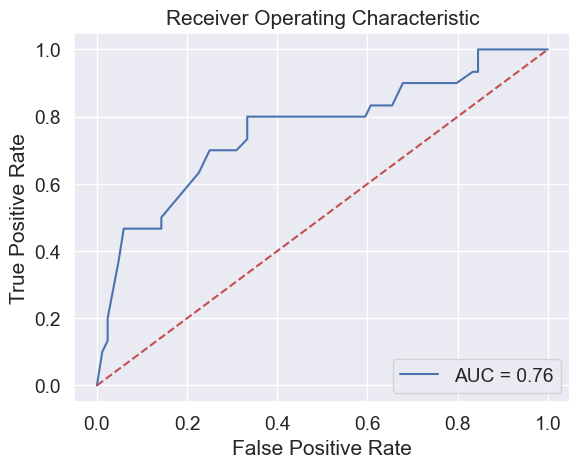

In [135]:
roc_auc(lgbm, X_test, y_test )

In [136]:
lgbm = LGBMClassifier()

# Estimate grid of the classifier hyperparameters
parameters = {'n_estimators': [5,10,50, 100, 200, 300]}

grid_optimization(lgbm, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:  {'n_estimators': 10}
Best Accuracy Through Grid Search : 0.811


In [161]:
# parameters = {'n_estimators': [5,10,50, 100, 200, 300],  
#              }

# lgbm = LGBMClassifier()
# gs = GridSearchCV(lgbm, parameters, scoring = 'accuracy',  cv=5, n_jobs=-1, verbose=True)

# gs.fit(X_train, y_train)
# pred = gs.predict(X_test)
# print(f'Actual test score: {accuracy_score(pred, y_test):.4f}')
# print('Best parameters: ', gs.best_params_)

### Метод опорных векторов SVM

In [149]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', degree=1, gamma='scale', C=1.0, probability=True)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

In [138]:
print("Train quality:")
quality_report(svm.predict(X_train), y_train)
print("\nTest quality:")
quality_report(svm.predict(X_test), y_test)

Train quality:
Accuracy: 0.785
Precision: 0.512
Recall: 0.863
f1_score: 0.642

Test quality:
Accuracy: 0.798
Precision: 0.400
Recall: 0.706
f1_score: 0.511


In [139]:
cm = confusion_matrix(y_test, svm_y_pred)
cm

array([[79,  5],
       [18, 12]], dtype=int64)

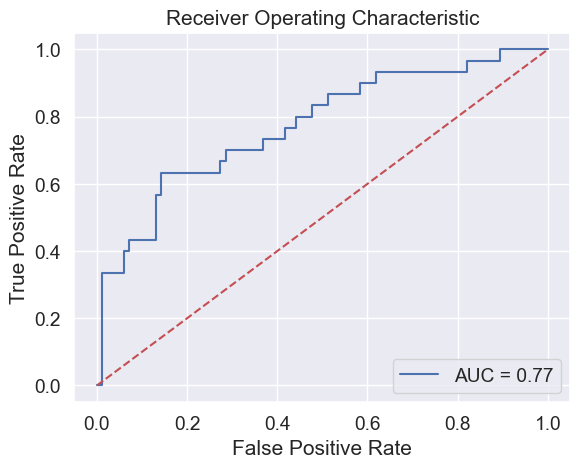

In [140]:
roc_auc(svm, X_test, y_test )

In [166]:
# svm = SVC()

# # Estimate grid of the classifier hyperparameters
# parameters = {'C':[1.0, 10.0, 20.0, None,], 
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'rbf'],
#               'gamma' : ['scale', 'auto'],
#               'degree' : [1, 3]
#               }

# # Define GridSearch parameters

# def grid_optimization(model, parameters, X_train, y_train, X_test):
#     gs = GridSearchCV(model,               # Classifier object to optimize
#                       parameters,          # Grid of the hyperparameters
#                       scoring='accuracy',  # Claasification quality metric to optimize
#                       cv=5,                # Number of folds in KFolds cross-validation (CV)
#                       n_jobs=-1, 
#                       verbose=True
#                      )

#     # Run Grid Search optimization
#     gs.fit(X_train, y_train)
#     print('Best parameters: ', gs.best_params_)    
#     print('Best Accuracy Through Grid Search : {:.3f}'.format(gs.best_score_))

In [141]:
svm = SVC()

# Estimate grid of the classifier hyperparameters
parameters = {'C':[1.0, 10.0, 20.0, None,], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'rbf'],
              'gamma' : ['scale', 'auto'],
              'degree' : [1, 3]
              }

grid_optimization(svm, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters:  {'C': 1.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Through Grid Search : 0.758


In [168]:
# # Define Decision Tree classifier with default parameters
# svm = SVC()

# # Estimate grid of the classifier hyperparameters
# parameters = {'C':[1.0, 10.0, 20.0, None,], 
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'rbf'],
#               'gamma' : ['scale', 'auto'],
#               'degree' : [1, 3]
#               }

# # Define GridSearch parameters
# gs = GridSearchCV(svm,                 # Classifier object to optimize
#                   parameters,          # Grid of the hyperparameters
#                   scoring='accuracy',  # Claasification quality metric to optimize
#                   cv=5,                # Number of folds in KFolds cross-validation (CV)
#                   n_jobs=-1, 
#                   verbose=True
#                  )


# # Run Grid Search optimization
# gs.fit(X_train, y_train)
# gs.best_params_

### Naive bayes

In [142]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(priors = None, var_smoothing = 1e-09)
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

In [143]:
print("Train quality:")
quality_report(gnb.predict(X_train), y_train)
print("\nTest quality:")
quality_report(gnb.predict(X_test), y_test)

Train quality:
Accuracy: 0.721
Precision: 0.541
Recall: 0.660
f1_score: 0.594

Test quality:
Accuracy: 0.763
Precision: 0.533
Recall: 0.552
f1_score: 0.542


In [144]:
cm = confusion_matrix(y_test, svm_y_pred)
cm

array([[79,  5],
       [18, 12]], dtype=int64)

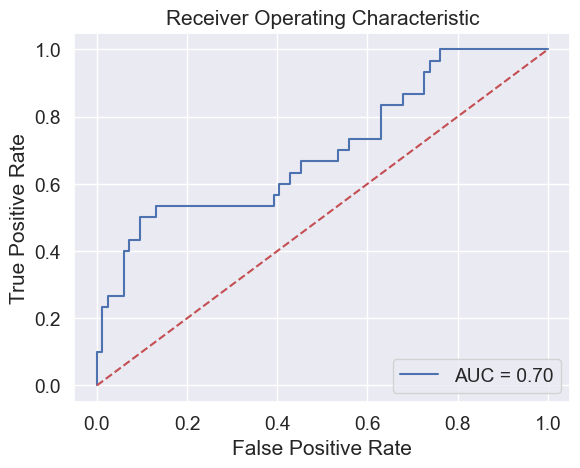

In [145]:
roc_auc(gnb, X_test, y_test )

In [173]:
gnb = GaussianNB()

# Estimate grid of the classifier hyperparameters
parameters = { 'priors': [None, [0.1,]* len(['TravelInsurance']),],
               'var_smoothing': [1e-9, 1e-6, 1e-12],
             }

grid_optimization(gnb, parameters, X_train, y_train, X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:  {'priors': None, 'var_smoothing': 1e-09}
Best Accuracy Through Grid Search : 0.716


In [174]:
# params = {
#             'priors': [None, [0.1,]* len(['TravelInsurance']),],
#             'var_smoothing': [1e-9, 1e-6, 1e-12],
#          }


# gaussian_nb_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# gaussian_nb_grid.fit(X_train, y_train)

# print('Best Accuracy Through Grid Search : {:.3f}'.format(gaussian_nb_grid.best_score_))
# print('Best Parameters : {}\n'.format(gaussian_nb_grid.best_params_))


### Сравнение метрик различных моделей

In [200]:
compare_models = pd.DataFrame({
    'Model Name': ['KNN', 'LR', 'DecisionTree', 'Bagging', 'RandomForest', 
                   'GBoost', 'CatBoost', 'LightGBM', 'SVM', 'Naive Bayes'],
    'True Positive': [confusion_matrix(y_test, knn_predictions_y).ravel()[0], 
                      confusion_matrix(y_test, lr_y_prediction).ravel()[0], 
                      confusion_matrix(y_test, dt_y_pred).ravel()[0], 
                      confusion_matrix(y_test, bagging_model_y_pred).ravel()[0], 
                      confusion_matrix(y_test, rf_y_pred).ravel()[0], 
                      confusion_matrix(y_test, gb_y_pred).ravel()[0], 
                      confusion_matrix(y_test, cb_y_pred).ravel()[0], 
                      confusion_matrix(y_test, lgbm_y_pred).ravel()[0], 
                      confusion_matrix(y_test, svm_y_pred).ravel()[0], 
                      confusion_matrix(y_test, gnb_y_pred).ravel()[0]],
    'True Negative': [confusion_matrix(y_test, knn_predictions_y).ravel()[1], 
                      confusion_matrix(y_test, lr_y_prediction).ravel()[1], 
                      confusion_matrix(y_test, dt_y_pred).ravel()[1], 
                      confusion_matrix(y_test, bagging_model_y_pred).ravel()[1],
                      confusion_matrix(y_test, rf_y_pred).ravel()[1], 
                      confusion_matrix(y_test, gb_y_pred).ravel()[1], 
                      confusion_matrix(y_test, cb_y_pred).ravel()[1], 
                      confusion_matrix(y_test, lgbm_y_pred).ravel()[1], 
                      confusion_matrix(y_test, svm_y_pred).ravel()[1], 
                      confusion_matrix(y_test, gnb_y_pred).ravel()[1]],
    'False Positive': [confusion_matrix(y_test, knn_predictions_y).ravel()[2], 
                      confusion_matrix(y_test, lr_y_prediction).ravel()[2], 
                      confusion_matrix(y_test, dt_y_pred).ravel()[2], 
                      confusion_matrix(y_test, bagging_model_y_pred).ravel()[2],  
                      confusion_matrix(y_test, rf_y_pred).ravel()[2], 
                      confusion_matrix(y_test, gb_y_pred).ravel()[2], 
                      confusion_matrix(y_test, cb_y_pred).ravel()[2], 
                      confusion_matrix(y_test, lgbm_y_pred).ravel()[2], 
                      confusion_matrix(y_test, svm_y_pred).ravel()[2], 
                      confusion_matrix(y_test, gnb_y_pred).ravel()[2]],
    'False Negative': [confusion_matrix(y_test, knn_predictions_y).ravel()[3], 
                      confusion_matrix(y_test, lr_y_prediction).ravel()[3], 
                      confusion_matrix(y_test, dt_y_pred).ravel()[3], 
                      confusion_matrix(y_test, bagging_model_y_pred).ravel()[3], 
                      confusion_matrix(y_test, rf_y_pred).ravel()[3], 
                      confusion_matrix(y_test, gb_y_pred).ravel()[3], 
                      confusion_matrix(y_test, cb_y_pred).ravel()[3], 
                      confusion_matrix(y_test, lgbm_y_pred).ravel()[3], 
                      confusion_matrix(y_test, svm_y_pred).ravel()[3], 
                      confusion_matrix(y_test, gnb_y_pred).ravel()[3]],
    'Accuracy': [accuracy_score(y_test, knn_predictions_y), 
                 accuracy_score(y_test, lr_y_prediction), 
                 accuracy_score(y_test, dt_y_pred), 
                 accuracy_score(y_test, bagging_model_y_pred), 
                 accuracy_score(y_test, rf_y_pred), 
                 accuracy_score(y_test, gb_y_pred), 
                 accuracy_score(y_test, cb_y_pred),
                 accuracy_score(y_test, lgbm_y_pred), 
                 accuracy_score(y_test, svm_y_pred), 
                 accuracy_score(y_test, gnb_y_pred)],            
    'Precision' : [precision_score(y_test, knn_predictions_y), 
                   precision_score(y_test, lr_y_prediction), 
                   precision_score(y_test, dt_y_pred), 
                   precision_score(y_test, bagging_model_y_pred), 
                   precision_score(y_test, rf_y_pred), 
                   precision_score(y_test, gb_y_pred), 
                   precision_score(y_test, cb_y_pred), 
                   precision_score(y_test, lgbm_y_pred), 
                   precision_score(y_test, svm_y_pred), 
                   precision_score(y_test, gnb_y_pred)],     
    'Recall' : [recall_score(y_test, knn_predictions_y), 
                recall_score(y_test, lr_y_prediction), 
                recall_score(y_test, dt_y_pred),
                recall_score(y_test, bagging_model_y_pred),
                recall_score(y_test, rf_y_pred), 
                recall_score(y_test, gb_y_pred), 
                recall_score(y_test, cb_y_pred), 
                recall_score(y_test, lgbm_y_pred), 
                recall_score(y_test, svm_y_pred), 
                recall_score(y_test, gnb_y_pred)],          
    'F1 Score' : [f1_score(y_test, knn_predictions_y), 
                  f1_score(y_test, lr_y_prediction), 
                  f1_score(y_test, dt_y_pred), 
                  f1_score(y_test, bagging_model_y_pred), 
                  f1_score(y_test, rf_y_pred), 
                  f1_score(y_test, gb_y_pred), 
                  f1_score(y_test, cb_y_pred), 
                  f1_score(y_test, lgbm_y_pred), 
                  f1_score(y_test, svm_y_pred), 
                  f1_score(y_test, gnb_y_pred)],  
    'AUC Score' : [roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]),
                  roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:,1]),
                  roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, cb.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]), 
                  roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])],  
})
compare_models

Model Name  True Positive  True Negative  False Positive  False Negative  \
0           KNN             79              5              17              13   
1            LR             77              7              16              14   
2  DecisionTree             79              5              16              14   
3       Bagging             79              5              16              14   
4  RandomForest             79              5              16              14   
5        GBoost             75              9              14              16   
6      CatBoost             79              5              16              14   
7      LightGBM             79              5              16              14   
8           SVM             79              5              18              12   
9   Naive Bayes             71             13              14              16   

   Accuracy  Precision    Recall  F1 Score  AUC Score  
0  0.807018   0.722222  0.433333  0.541667   0.777778  
1  0.798246   0.666667  0.466667  0.549020   0.736508  
2  0.815789   0.736842  0.466667  0.571429   0.723016  
3  0.815789   0.736842  0.466667  0.571429   0.752976  
4  0.815789   0.736842  0.466667  0.571429   0.754762  
5  0.798246   0.640000  0.533333  0.581818   0.715675  
6  0.815789   0.736842  0.466667  0.571429   0.750397  
7  0.815789   0.736842  0.466667  0.571429   0.759722  
8  0.798246   0.705882  0.400000  0.510638   0.773016  
9  0.763158   0.551724  0.533333  0.542373   0.700000

### Загружаем второй датасет (не содержит таргета) для проверки моделей

In [151]:
data_new = pd.read_csv('Travel_Company_New_Clients.csv', sep = ';')
data_new.head()

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   25  Private Sector/Self Employed            No       1150000   
1   34  Private Sector/Self Employed           Yes       1500000   
2   33  Private Sector/Self Employed           Yes       1500000   
3   28  Private Sector/Self Employed           Yes       1150000   
4   33             Government Sector           Yes        400000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  
0              4                0            No                  No  
1              4                1           Yes                 Yes  
2              3                0           Yes                 Yes  
3              3                0            No                  No  
4              5                1            No                  No

In [152]:
data_new.shape

(1303, 8)

In [153]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1303 non-null   int64 
 1   Employment Type      1303 non-null   object
 2   GraduateOrNot        1303 non-null   object
 3   AnnualIncome         1303 non-null   int64 
 4   FamilyMembers        1303 non-null   int64 
 5   ChronicDiseases      1303 non-null   int64 
 6   FrequentFlyer        1303 non-null   object
 7   EverTravelledAbroad  1303 non-null   object
dtypes: int64(4), object(4)
memory usage: 81.6+ KB


In [154]:
data_new.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [155]:
data_new.duplicated().sum()

483

In [156]:
data_new.drop_duplicates(inplace = True)
data_new = data_new.reset_index(drop = True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  820 non-null    int64 
 1   Employment Type      820 non-null    object
 2   GraduateOrNot        820 non-null    object
 3   AnnualIncome         820 non-null    int64 
 4   FamilyMembers        820 non-null    int64 
 5   ChronicDiseases      820 non-null    int64 
 6   FrequentFlyer        820 non-null    object
 7   EverTravelledAbroad  820 non-null    object
dtypes: int64(4), object(4)
memory usage: 51.4+ KB


### Выводы
1. Датасет не содержит таргета
2. Размер 1303 х 8
3. Нет пропусков
4. 4 категориальных признака
5. Дубликаты 483
6. Размер датасета без дубликатов 820 х 8

### Визуализация датасета

In [157]:
data_new.describe()

Age  AnnualIncome  FamilyMembers  ChronicDiseases
count  820.000000  8.200000e+02     820.000000       820.000000
mean    29.731707  9.356707e+05       4.851220         0.328049
std      2.975475  3.700462e+05       1.747089         0.469789
min     25.000000  3.000000e+05       2.000000         0.000000
25%     28.000000  6.000000e+05       3.000000         0.000000
50%     29.000000  9.000000e+05       5.000000         0.000000
75%     33.000000  1.200000e+06       6.000000         1.000000
max     35.000000  1.800000e+06       9.000000         1.000000

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>]], dtype=object)

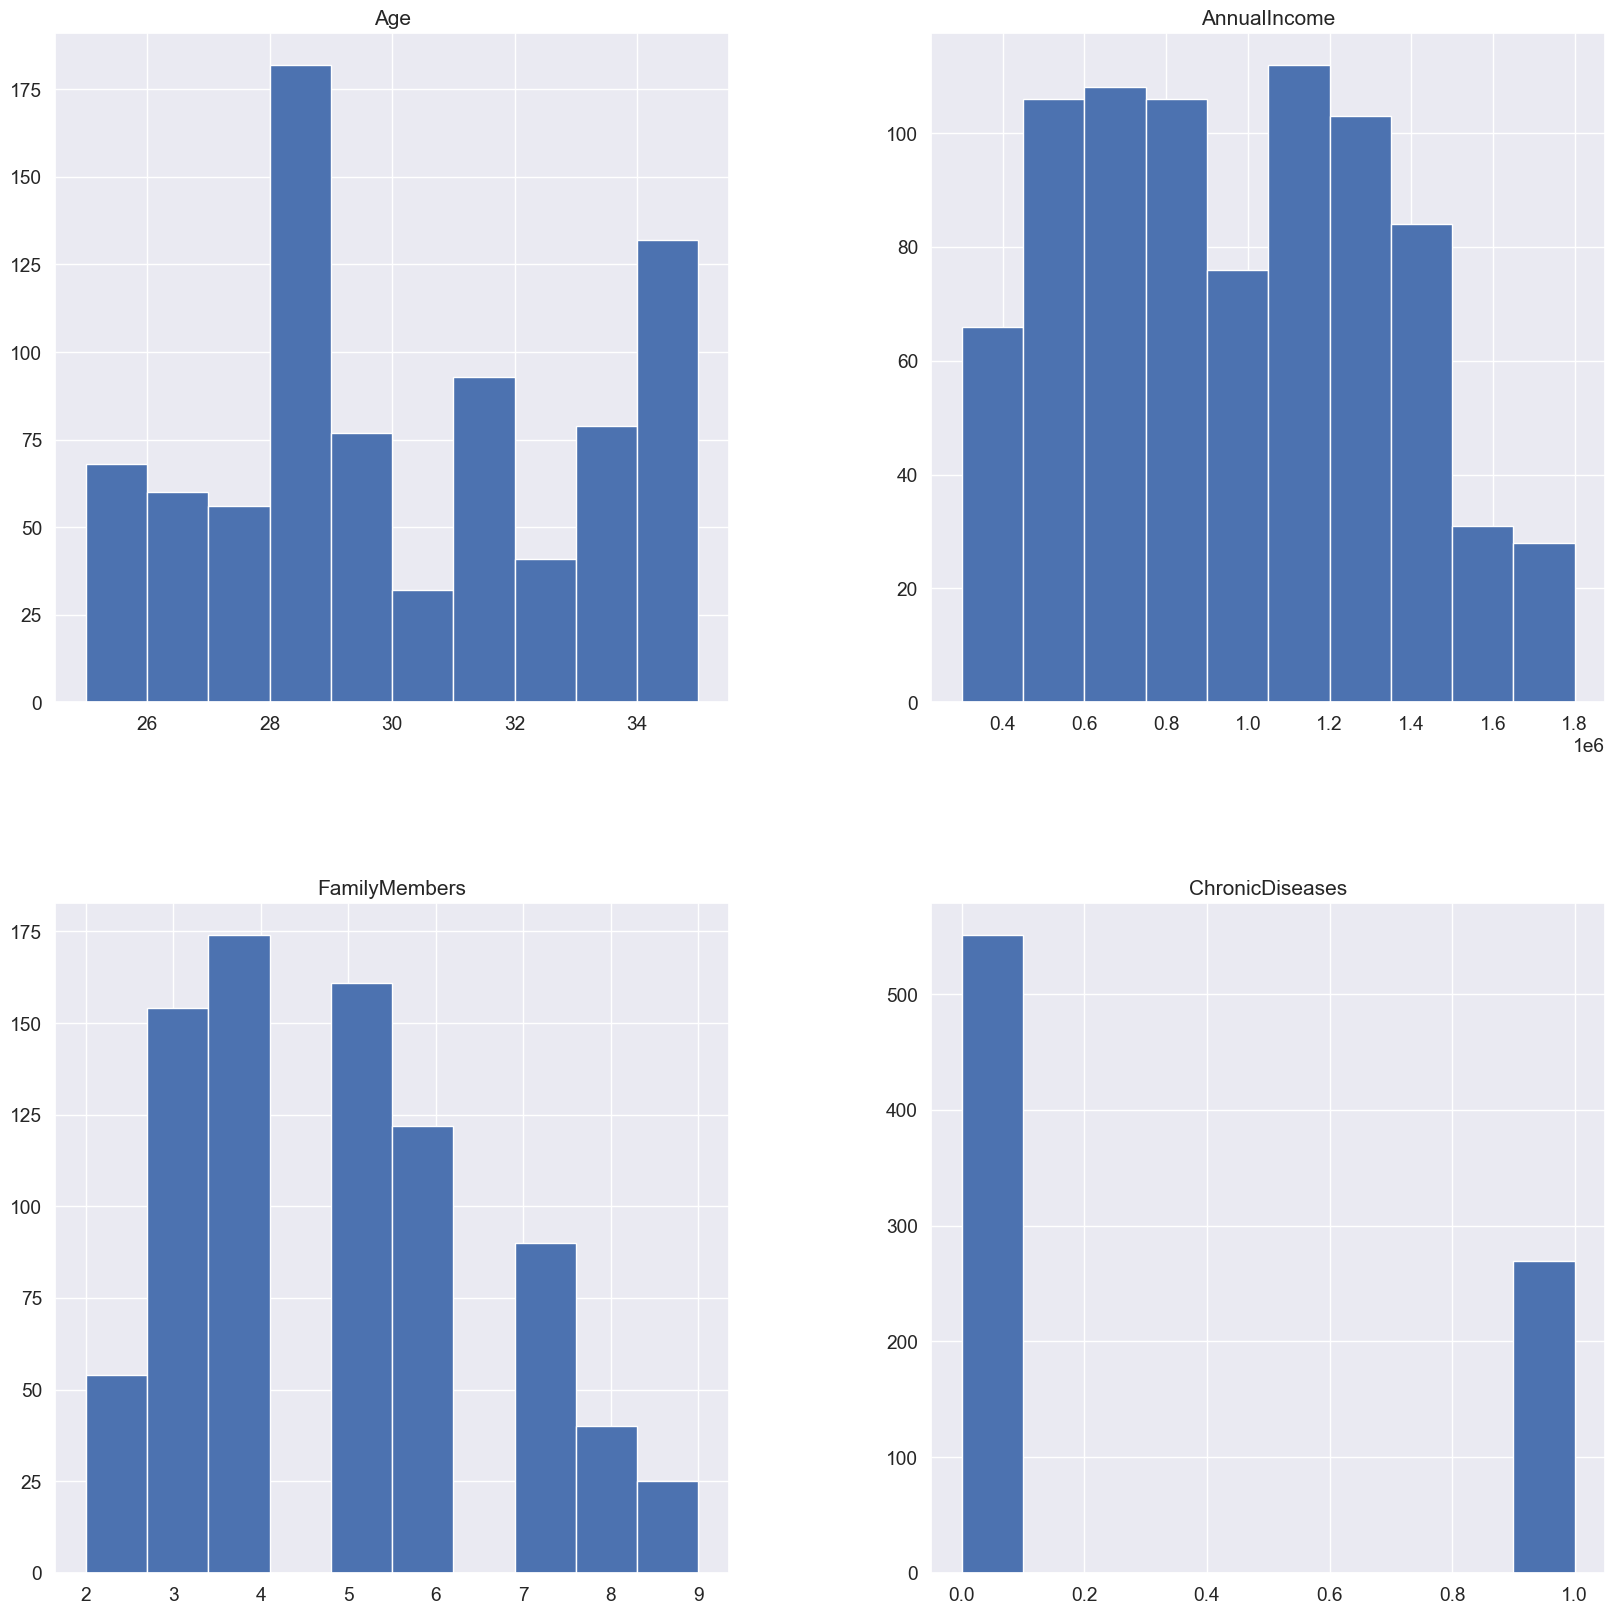

In [158]:
data_new.hist(figsize=(20, 20))

28    22.195122
34    12.560976
31    11.341463
33     9.634146
29     9.390244
25     8.292683
26     7.317073
27     6.829268
32     5.000000
30     3.902439
35     3.536585
Name: Age, dtype: float64

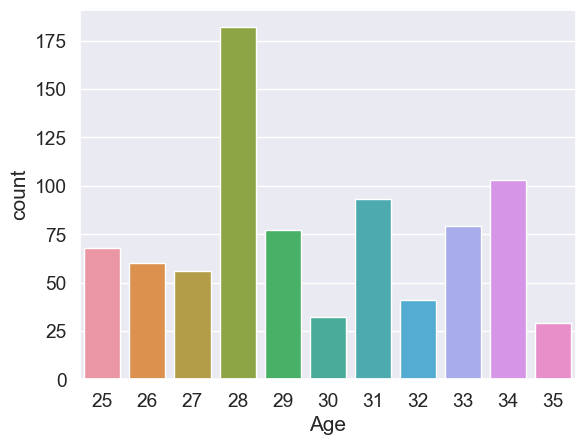

In [159]:
sns.countplot(x = data_new['Age'])
# структура по колонке x, выраженная в %
data_new['Age'].value_counts(normalize=True)*100

Yes    83.170732
No     16.829268
Name: GraduateOrNot, dtype: float64

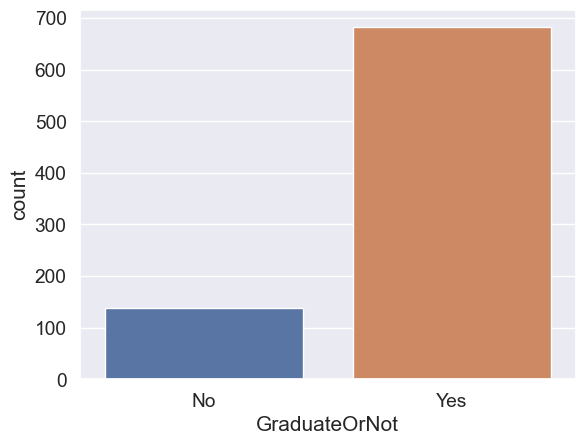

In [160]:
sns.countplot(x = data_new['GraduateOrNot'])
# структура по колонке x, выраженная в %
data_new['GraduateOrNot'].value_counts(normalize=True)*100

Private Sector/Self Employed    68.658537
Government Sector               31.341463
Name: Employment Type, dtype: float64

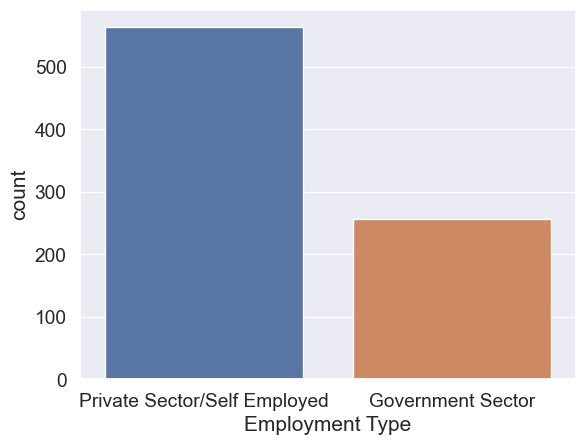

In [161]:
sns.countplot(x = data_new['Employment Type'])
# структура по колонке x, выраженная в %
data_new['Employment Type'].value_counts(normalize=True)*100

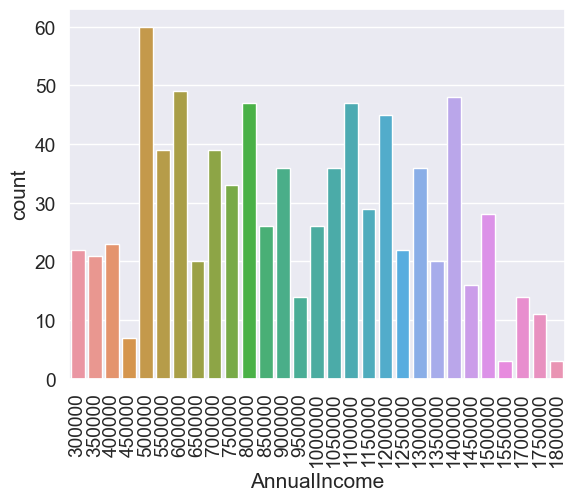

500000     7.317073
600000     5.975610
1400000    5.853659
800000     5.731707
1100000    5.731707
1200000    5.487805
550000     4.756098
700000     4.756098
1050000    4.390244
1300000    4.390244
900000     4.390244
750000     4.024390
1150000    3.536585
1500000    3.414634
1000000    3.170732
850000     3.170732
400000     2.804878
300000     2.682927
1250000    2.682927
350000     2.560976
1350000    2.439024
650000     2.439024
1450000    1.951220
950000     1.707317
1700000    1.707317
1750000    1.341463
450000     0.853659
1550000    0.365854
1800000    0.365854
Name: AnnualIncome, dtype: float64

In [162]:
sns.countplot(x = data_new['AnnualIncome'])
plt.xticks(rotation = 90)
plt.show()
# структура по колонке x, выраженная в %
data_new['AnnualIncome'].value_counts(normalize=True)*100

4    21.219512
5    19.634146
3    18.780488
6    14.878049
7    10.975610
2     6.585366
8     4.878049
9     3.048780
Name: FamilyMembers, dtype: float64

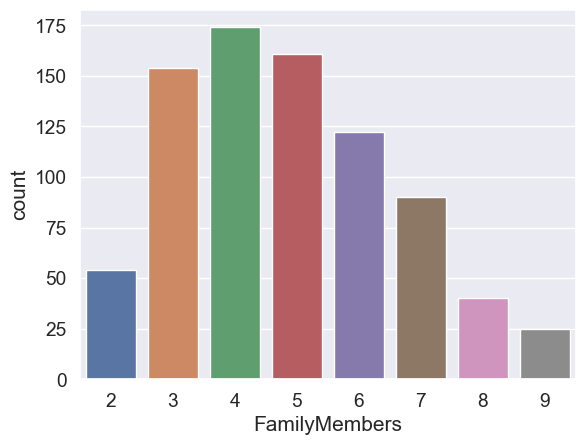

In [163]:
sns.countplot(x = data_new['FamilyMembers'])
# структура по колонке x, выраженная в %
data_new['FamilyMembers'].value_counts(normalize=True)*100

0    67.195122
1    32.804878
Name: ChronicDiseases, dtype: float64

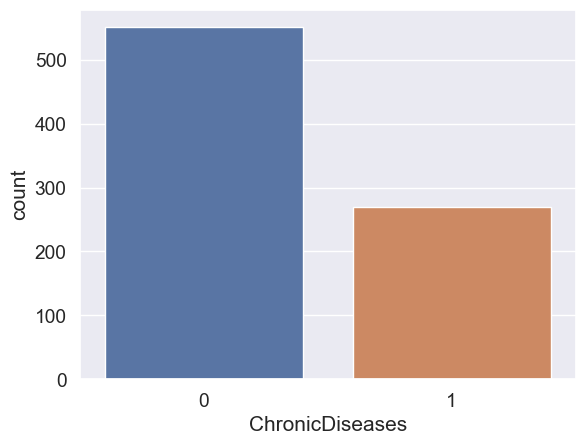

In [164]:
sns.countplot(x = data_new['ChronicDiseases'])
# структура по колонке x, выраженная в %
data_new['ChronicDiseases'].value_counts(normalize=True)*100

No     75.0
Yes    25.0
Name: FrequentFlyer, dtype: float64

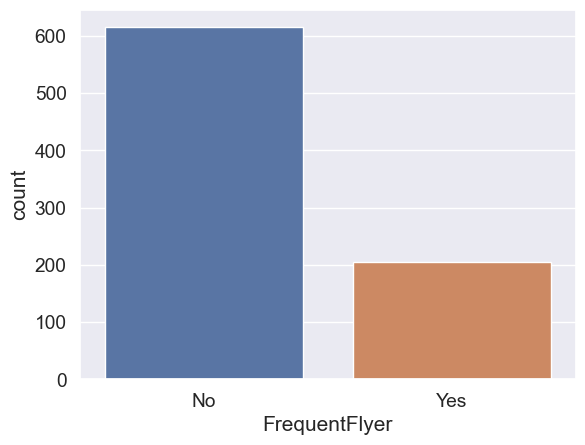

In [165]:
sns.countplot(x = data_new['FrequentFlyer'])
# структура по колонке x, выраженная в %
data_new['FrequentFlyer'].value_counts(normalize=True)*100

No     79.512195
Yes    20.487805
Name: EverTravelledAbroad, dtype: float64

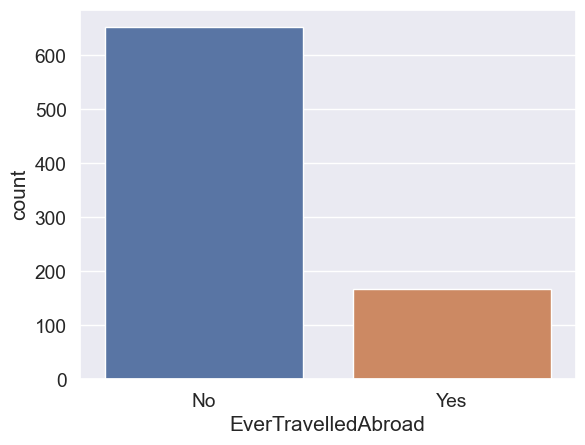

In [166]:
sns.countplot(x = data_new['EverTravelledAbroad'])
# структура по колонке x, выраженная в %
data_new['EverTravelledAbroad'].value_counts(normalize=True)*100

In [167]:
data_new.corr()

Age  AnnualIncome  FamilyMembers  ChronicDiseases
Age              1.000000     -0.024732       0.033886        -0.024309
AnnualIncome    -0.024732      1.000000      -0.019355         0.011270
FamilyMembers    0.033886     -0.019355       1.000000        -0.043109
ChronicDiseases -0.024309      0.011270      -0.043109         1.000000

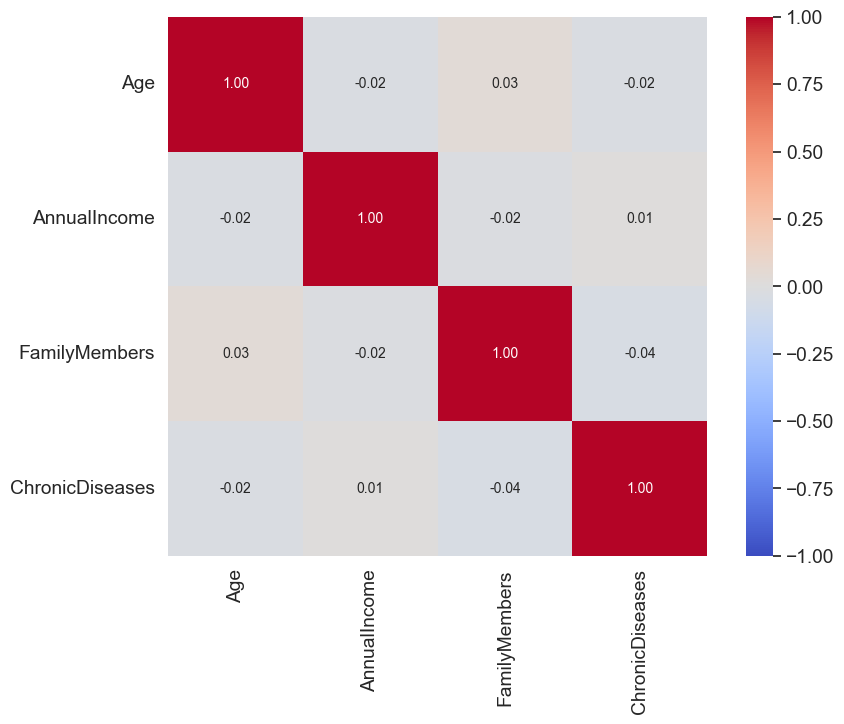

In [168]:
plt.subplots(figsize=(10,7))
sns.heatmap(data_new.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

### Работа с категориальными признаками

In [169]:
data_new['GraduateOrNot'].unique()

array(['No', 'Yes'], dtype=object)

In [170]:
data_new['GraduateOrNot'] = data_new['GraduateOrNot'].apply(lambda x: 1 if x=='Yes' else 0)

In [171]:
data_new['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [172]:
data_new['FrequentFlyer'] = data_new['FrequentFlyer'].apply(lambda x: 1 if x=='Yes' else 0)

In [173]:
data_new['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [174]:
data_new['EverTravelledAbroad'] = data_new['EverTravelledAbroad'].apply(lambda x: 1 if x=='Yes' else 0)

In [175]:
data_new['Employment Type'].unique()

array(['Private Sector/Self Employed', 'Government Sector'], dtype=object)

In [176]:
print(data_new['Employment Type']. value_counts ()['Government Sector'])
print(data_new['Employment Type']. value_counts ()['Private Sector/Self Employed'])

257
563


In [177]:
enc = OneHotEncoder()
enc.fit_transform(data_new[['Employment Type']]).head()

Employment Type_1  Employment Type_2
0                  1                  0
1                  1                  0
2                  1                  0
3                  1                  0
4                  0                  1

In [178]:
data_new = data_new.drop(['Employment Type'], axis = 1).join(enc.fit_transform(data_new[['Employment Type']], axis = 0))
data_new.head()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  \
0   25              0       1150000              4                0   
1   34              1       1500000              4                1   
2   33              1       1500000              3                0   
3   28              1       1150000              3                0   
4   33              1        400000              5                1   

   FrequentFlyer  EverTravelledAbroad  Employment Type_1  Employment Type_2  
0              0                    0                  1                  0  
1              1                    1                  1                  0  
2              1                    1                  1                  0  
3              0                    0                  1                  0  
4              0                    0                  0                  1

In [179]:
data_new.describe()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
count  820.000000     820.000000  8.200000e+02     820.000000   
mean    29.731707       0.831707  9.356707e+05       4.851220   
std      2.975475       0.374354  3.700462e+05       1.747089   
min     25.000000       0.000000  3.000000e+05       2.000000   
25%     28.000000       1.000000  6.000000e+05       3.000000   
50%     29.000000       1.000000  9.000000e+05       5.000000   
75%     33.000000       1.000000  1.200000e+06       6.000000   
max     35.000000       1.000000  1.800000e+06       9.000000   

       ChronicDiseases  FrequentFlyer  EverTravelledAbroad  Employment Type_1  \
count       820.000000     820.000000           820.000000         820.000000   
mean          0.328049       0.250000             0.204878           0.686585   
std           0.469789       0.433277             0.403859           0.464164   
min           0.000000       0.000000             0.000000           0.000000   
25%           0.000000       0.000000             0.000000           0.000000   
50%           0.000000       0.000000             0.000000           1.000000   
75%           1.000000       0.250000             0.000000           1.000000   
max           1.000000       1.000000             1.000000           1.000000   

       Employment Type_2  
count         820.000000  
mean            0.313415  
std             0.464164  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000

In [180]:
data_new.corr()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
Age                  1.000000       0.044916     -0.024732       0.033886   
GraduateOrNot        0.044916       1.000000      0.106409       0.040079   
AnnualIncome        -0.024732       0.106409      1.000000      -0.019355   
FamilyMembers        0.033886       0.040079     -0.019355       1.000000   
ChronicDiseases     -0.024309       0.001880      0.011270      -0.043109   
FrequentFlyer       -0.047355      -0.026347      0.308711      -0.055649   
EverTravelledAbroad -0.048698       0.034511      0.441248      -0.041540   
Employment Type_1   -0.144945      -0.163383      0.254258      -0.003368   
Employment Type_2    0.144945       0.163383     -0.254258       0.003368   

                     ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
Age                        -0.024309      -0.047355            -0.048698   
GraduateOrNot               0.001880      -0.026347             0.034511   
AnnualIncome                0.011270       0.308711             0.441248   
FamilyMembers              -0.043109      -0.055649            -0.041540   
ChronicDiseases             1.000000      -0.073482            -0.013593   
FrequentFlyer              -0.073482       1.000000             0.230269   
EverTravelledAbroad        -0.013593       0.230269             1.000000   
Employment Type_1          -0.003872       0.104729             0.160582   
Employment Type_2           0.003872      -0.104729            -0.160582   

                     Employment Type_1  Employment Type_2  
Age                          -0.144945           0.144945  
GraduateOrNot                -0.163383           0.163383  
AnnualIncome                  0.254258          -0.254258  
FamilyMembers                -0.003368           0.003368  
ChronicDiseases              -0.003872           0.003872  
FrequentFlyer                 0.104729          -0.104729  
EverTravelledAbroad           0.160582          -0.160582  
Employment Type_1             1.000000          -1.000000  
Employment Type_2            -1.000000           1.000000

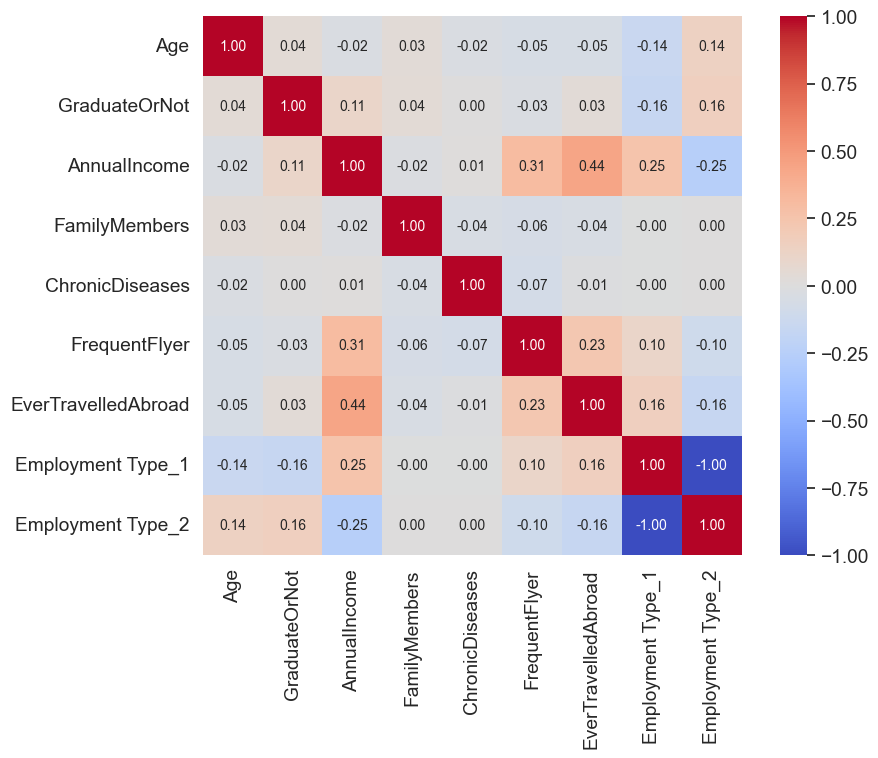

In [181]:
plt.subplots(figsize=(10,7))
sns.heatmap(data_new.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

### Сравнение двух датасетов

In [182]:
compare_models = pd.DataFrame({
    'Data': ['Age_mean', 'Age_std', 'GraduateOrNot_mean', 'GraduateOrNot_std', 'AnnualIncome_mean', 'AnnualIncome_std', 
             'FamilyMembers_mean', 'FamilyMembers_std', 'ChronicDiseases_mean', 'ChronicDiseases_std',
             'FrequentFlyer_mean', 'FrequentFlyer_std', 'EverTravelledAbroad_mean', 'EverTravelledAbroad_std',
             'Employment Type_1_mean', 'Employment Type_1_std', 'Employment Type_2_mean', 'Employment Type_2_std',
            ],
    'data': [data['Age'].mean(),
             data['Age'].std(), 
             data['GraduateOrNot'].mean(), 
             data['GraduateOrNot'].std(),
             data['AnnualIncome'].mean(), 
             data['AnnualIncome'].std(),
             data['FamilyMembers'].mean(), 
             data['FamilyMembers'].std(), 
             data['ChronicDiseases'].mean(),
             data['ChronicDiseases'].std(),
             data['FrequentFlyer'].mean(), 
             data['FrequentFlyer'].std(),
             data['EverTravelledAbroad'].mean(), 
             data['EverTravelledAbroad'].std(),
             data['Employment Type_1'].mean(),
             data['Employment Type_1'].std(),
             data['Employment Type_2'].mean(),
             data['Employment Type_2'].std(),
            ],
    'data_new': [data_new['Age'].mean(), 
                 data_new['Age'].std(), 
                 data_new['GraduateOrNot'].mean(),
                 data_new['GraduateOrNot'].std(),
                 data_new['AnnualIncome'].mean(), 
                 data_new['AnnualIncome'].std(), 
                 data_new['FamilyMembers'].mean(), 
                 data_new['FamilyMembers'].std(), 
                 data_new['ChronicDiseases'].mean(), 
                 data_new['ChronicDiseases'].std(),
                 data_new['FrequentFlyer'].mean(), 
                 data_new['FrequentFlyer'].std(), 
                 data_new['EverTravelledAbroad'].mean(), 
                 data_new['EverTravelledAbroad'].std(), 
                 data_new['Employment Type_1'].mean(),
                 data_new['Employment Type_1'].std(),
                 data_new['Employment Type_2'].mean(),
                 data_new['Employment Type_2'].std(),
                ],
    'different_%': [( (data_new['Age'].mean() - data['Age'].mean()) / (data['Age'].mean()) )*100, 
                    ( (data_new['Age'].std() - data['Age'].std()) / (data['Age'].std()) )*100,
                    ( (data_new['GraduateOrNot'].mean() - data['GraduateOrNot'].mean())/(data['GraduateOrNot'].mean()) )*100, 
                    ( (data_new['GraduateOrNot'].std() - data['GraduateOrNot'].std())/(data['GraduateOrNot'].std()) )*100, 
                    ( (data_new['AnnualIncome'].mean() - data['AnnualIncome'].mean())/(data['AnnualIncome'].mean()) )*100, 
                    ( (data_new['AnnualIncome'].std() - data['AnnualIncome'].std())/(data['AnnualIncome'].std()) )*100,
                    ( (data_new['FamilyMembers'].mean() - data['FamilyMembers'].mean())/(data['FamilyMembers'].mean()) )*100,
                    ( (data_new['FamilyMembers'].std() - data['FamilyMembers'].std())/(data['FamilyMembers'].std()) )*100,
                    ( (data_new['ChronicDiseases'].mean() - data['ChronicDiseases'].mean())/(data['ChronicDiseases'].mean()) )*100, 
                    ( (data_new['ChronicDiseases'].std() - data['ChronicDiseases'].std())/(data['ChronicDiseases'].std()) )*100, 
                    ( (data_new['FrequentFlyer'].mean() - data['FrequentFlyer'].mean())/(data['FrequentFlyer'].mean()) )*100, 
                    ( (data_new['FrequentFlyer'].std() - data['FrequentFlyer'].std())/(data['FrequentFlyer'].std()) )*100, 
                    ( (data_new['EverTravelledAbroad'].mean() - data['EverTravelledAbroad'].mean())/(data['EverTravelledAbroad'].mean()) )*100,
                    ( (data_new['EverTravelledAbroad'].std() - data['EverTravelledAbroad'].std())/(data['EverTravelledAbroad'].std()) )*100, 
                    ( (data_new['Employment Type_1'].mean() - data['Employment Type_1'].mean())/(data['Employment Type_1'].mean()) )*100,
                    ( (data_new['Employment Type_1'].std() - data['Employment Type_1'].std())/(data['Employment Type_1'].std()) )*100,
                    ( (data_new['Employment Type_2'].mean() - data['Employment Type_2'].mean())/(data['Employment Type_2'].mean()) )*100,
                    ( (data_new['Employment Type_2'].std() - data['Employment Type_2'].std())/(data['Employment Type_2'].std()) )*100,
                   ],                   
            })
compare_models 

Data           data       data_new  different_%
0                   Age_mean      29.627417      29.731707     0.352008
1                    Age_std       2.887873       2.975475     3.033436
2         GraduateOrNot_mean       0.848858       0.831707    -2.020401
3          GraduateOrNot_std       0.358503       0.374354     4.421605
4          AnnualIncome_mean  955184.534271  935670.731707    -2.042935
5           AnnualIncome_std  363732.619313  370046.248467     1.735789
6         FamilyMembers_mean       4.912127       4.851220    -1.239932
7          FamilyMembers_std       1.702115       1.747089     2.642238
8       ChronicDiseases_mean       0.305800       0.328049     7.275722
9        ChronicDiseases_std       0.461151       0.469789     1.873257
10        FrequentFlyer_mean       0.226714       0.250000    10.271318
11         FrequentFlyer_std       0.419074       0.433277     3.389091
12  EverTravelledAbroad_mean       0.196837       0.204878     4.085366
13   EverTravelledAbroad_std       0.397958       0.403859     1.482872
14    Employment Type_1_mean       0.261863       0.686585   162.192667
15     Employment Type_1_std       0.440035       0.464164     5.483469
16    Employment Type_2_mean       0.738137       0.313415   -57.539779
17     Employment Type_2_std       0.440035       0.464164     5.483469

In [183]:
# более компактный вариант сравнения
data_1 = X.describe()
data_2 = data_new.describe()
# сравнить и показать все данные (даже совпадающие в разных датафреймах)
data_1.compare(data_2, result_names=('data_old', 'data_new'), align_axis=0, keep_equal=True, keep_shape=True)

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
count data_old  569.000000     569.000000  5.690000e+02     569.000000   
      data_new  820.000000     820.000000  8.200000e+02     820.000000   
mean  data_old   29.627417       0.848858  9.551845e+05       4.912127   
      data_new   29.731707       0.831707  9.356707e+05       4.851220   
std   data_old    2.887873       0.358503  3.637326e+05       1.702115   
      data_new    2.975475       0.374354  3.700462e+05       1.747089   
min   data_old   25.000000       0.000000  3.000000e+05       2.000000   
      data_new   25.000000       0.000000  3.000000e+05       2.000000   
25%   data_old   28.000000       1.000000  6.500000e+05       4.000000   
      data_new   28.000000       1.000000  6.000000e+05       3.000000   
50%   data_old   29.000000       1.000000  9.500000e+05       5.000000   
      data_new   29.000000       1.000000  9.000000e+05       5.000000   
75%   data_old   32.000000       1.000000  1.250000e+06       6.000000   
      data_new   33.000000       1.000000  1.200000e+06       6.000000   
max   data_old   35.000000       1.000000  1.800000e+06       9.000000   
      data_new   35.000000       1.000000  1.800000e+06       9.000000   

                ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
count data_old       569.000000     569.000000           569.000000   
      data_new       820.000000     820.000000           820.000000   
mean  data_old         0.305800       0.226714             0.196837   
      data_new         0.328049       0.250000             0.204878   
std   data_old         0.461151       0.419074             0.397958   
      data_new         0.469789       0.433277             0.403859   
min   data_old         0.000000       0.000000             0.000000   
      data_new         0.000000       0.000000             0.000000   
25%   data_old         0.000000       0.000000             0.000000   
      data_new         0.000000       0.000000             0.000000   
50%   data_old         0.000000       0.000000             0.000000   
      data_new         0.000000       0.000000             0.000000   
75%   data_old         1.000000       0.000000             0.000000   
      data_new         1.000000       0.250000             0.000000   
max   data_old         1.000000       1.000000             1.000000   
      data_new         1.000000       1.000000             1.000000   

                Employment Type_1  Employment Type_2  
count data_old         569.000000         569.000000  
      data_new         820.000000         820.000000  
mean  data_old           0.261863           0.738137  
      data_new           0.686585           0.313415  
std   data_old           0.440035           0.440035  
      data_new           0.464164           0.464164  
min   data_old           0.000000           0.000000  
      data_new           0.000000           0.000000  
25%   data_old           0.000000           0.000000  
      data_new           0.000000           0.000000  
50%   data_old           0.000000           1.000000  
      data_new           1.000000           0.000000  
75%   data_old           1.000000           1.000000  
      data_new           1.000000           1.000000  
max   data_old           1.000000           1.000000  
      data_new           1.000000           1.000000

In [184]:
# показать только различия
data_1.compare(data_2, result_names=('data_old', 'data_new'), align_axis=0)

Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
count data_old  569.000000     569.000000  5.690000e+02     569.000000   
      data_new  820.000000     820.000000  8.200000e+02     820.000000   
mean  data_old   29.627417       0.848858  9.551845e+05       4.912127   
      data_new   29.731707       0.831707  9.356707e+05       4.851220   
std   data_old    2.887873       0.358503  3.637326e+05       1.702115   
      data_new    2.975475       0.374354  3.700462e+05       1.747089   
25%   data_old         NaN            NaN  6.500000e+05       4.000000   
      data_new         NaN            NaN  6.000000e+05       3.000000   
50%   data_old         NaN            NaN  9.500000e+05            NaN   
      data_new         NaN            NaN  9.000000e+05            NaN   
75%   data_old   32.000000            NaN  1.250000e+06            NaN   
      data_new   33.000000            NaN  1.200000e+06            NaN   

                ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
count data_old       569.000000     569.000000           569.000000   
      data_new       820.000000     820.000000           820.000000   
mean  data_old         0.305800       0.226714             0.196837   
      data_new         0.328049       0.250000             0.204878   
std   data_old         0.461151       0.419074             0.397958   
      data_new         0.469789       0.433277             0.403859   
25%   data_old              NaN            NaN                  NaN   
      data_new              NaN            NaN                  NaN   
50%   data_old              NaN            NaN                  NaN   
      data_new              NaN            NaN                  NaN   
75%   data_old              NaN       0.000000                  NaN   
      data_new              NaN       0.250000                  NaN   

                Employment Type_1  Employment Type_2  
count data_old         569.000000         569.000000  
      data_new         820.000000         820.000000  
mean  data_old           0.261863           0.738137  
      data_new           0.686585           0.313415  
std   data_old           0.440035           0.440035  
      data_new           0.464164           0.464164  
25%   data_old                NaN                NaN  
      data_new                NaN                NaN  
50%   data_old           0.000000           1.000000  
      data_new           1.000000           0.000000  
75%   data_old                NaN                NaN  
      data_new                NaN                NaN

### Построение модели

In [185]:
X_new_test = scaler.transform(data_new)

In [186]:
X_train.shape, X_new_test.shape, y_train.shape

((455, 9), (820, 9), (455,))

In [187]:
lgbm_predictions_new_y = lgbm.predict(X_new_test)

In [188]:
data_new['predicted_TravelInsurance'] = lgbm_predictions_new_y

In [189]:
data_new.head()

Age  GraduateOrNot  AnnualIncome  FamilyMembers  ChronicDiseases  \
0   25              0       1150000              4                0   
1   34              1       1500000              4                1   
2   33              1       1500000              3                0   
3   28              1       1150000              3                0   
4   33              1        400000              5                1   

   FrequentFlyer  EverTravelledAbroad  Employment Type_1  Employment Type_2  \
0              0                    0                  1                  0   
1              1                    1                  1                  0   
2              1                    1                  1                  0   
3              0                    0                  1                  0   
4              0                    0                  0                  1   

   predicted_TravelInsurance  
0                          0  
1                          1  
2                          1  
3                          0  
4                          0

In [190]:
fmt='.2f'
data_new['predicted_TravelInsurance'].value_counts(normalize=True)*100

0    75.0
1    25.0
Name: predicted_TravelInsurance, dtype: float64

In [191]:
print(data_new['predicted_TravelInsurance']. value_counts ()[0])
print(data_new['predicted_TravelInsurance']. value_counts ()[1])

615
205


In [192]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        820 non-null    int64
 1   GraduateOrNot              820 non-null    int64
 2   AnnualIncome               820 non-null    int64
 3   FamilyMembers              820 non-null    int64
 4   ChronicDiseases            820 non-null    int64
 5   FrequentFlyer              820 non-null    int64
 6   EverTravelledAbroad        820 non-null    int64
 7   Employment Type_1          820 non-null    int64
 8   Employment Type_2          820 non-null    int64
 9   predicted_TravelInsurance  820 non-null    int64
dtypes: int64(10)
memory usage: 64.2 KB
